# Description
The goal of this report is to give policy makers a more complete picture of the state of elementary enrollment in the Eau Claire area school district. My hope is that this analysis will aid in making informed decisions about demographic issues in the future.

The data for this report was gathered from the last seven years of third Friday enrollment numbers. I have aggregated the data in various ways to illustrate metrics that I believe could be helpful.

There are various points in this report where I made analysis that was not available in the third Friday enrollment reports. When this occurs, I have made a note of it in the analysis.

Though I am not a statistician, I have been a software engineer for twenty years and I have used my background to provide this data, to the best of my ability.

# Compiling the Initial Dataset
The third Friday counts were acquired by an open record request. They were provided as a PDF, so I manually extracted the data into a spreadsheet, then it parsed using Python and Pandas.

In [7]:
from ecasd_enrollment.data import enrollment
from IPython.display import display

display(enrollment)

Date     School Grade  Students  Year Graduation Year
0   2023-09-15      Davey     K        17  2023            2028
1   2023-09-15      Davey     K        15  2023            2028
2   2023-09-15      Davey     K        16  2023            2028
3   2023-09-15      Flynn     K        17  2023            2028
4   2023-09-15      Flynn     K        17  2023            2028
..         ...        ...   ...       ...   ...             ...
228 2024-09-20  Roosevelt     5        20  2024            2024
229 2024-09-20  Roosevelt     5        18  2024            2024
230 2024-09-20    Sherman     5        30  2024            2024
231 2024-09-20    Sherman     5        29  2024            2024
232 2024-09-20    Sherman     5        28  2024            2024

[5781 rows x 6 columns]

# Per-School Classroom Usage Analysis
When the number of classrooms at a school exceed the number of available classrooms, schools are faced with a difficult decision about where to put these "overflow" classrooms. Frequently, other services at the school are sacraficed to make room. Computer labs, special education rooms, and hallways become educational spaces. These are not ideal outcomes, so it's critical that policy makers are aware of this measurement.

*Editorial decision: I do not have exact educational classroom counts for each school. I have made an estimation that it is `6 times the stated number of sections for the school`.*

In [8]:
import numpy as np
import pandas as pd
from IPython.display import Markdown

classrooms_per_school_year = enrollment[['Year','School','Students']].groupby(['Year','School'], observed=True).count().astype(np.int_).rename(columns={'Students':'Classrooms in Use'})

cdf = pd.DataFrame([('Davey', 18),('Flynn', 12),('Lakeshore', 18),('Locust Lane', 18),('Longfellow', 18),('Manz', 18),('Meadowview', 18),('Northwoods', 18),('Putnam Heights', 18),('Robbins', 24),('Roosevelt',12),('Sherman',24)], columns=['School','Available Classrooms'])
classroom_utilization_per_school_year = classrooms_per_school_year.reset_index().merge(cdf)

for schoolName, school_classroom_utilization_per_year in classroom_utilization_per_school_year.groupby('School', observed=True):
    display(Markdown(f'## {schoolName}'))
    display(school_classroom_utilization_per_year.set_index(['Year']).sort_values('Year', ascending=False)[['Classrooms in Use', 'Available Classrooms']])

## Davey

Classrooms in Use  Available Classrooms
Year                                         
2024                 15                    18
2023                 17                    18
2022                 17                    18
2021                 16                    18
2020                 21                    18
2019                 15                    18
2018                 15                    18
2017                 16                    18
2016                 17                    18
2015                 17                    18
2014                 17                    18
2013                 18                    18
2012                 19                    18
2011                 18                    18
2010                 19                    18
2009                 18                    18
2008                 19                    18
2007                 16                    18
2006                 17                    18
2005                 19                    18
2004                 18                    18
2003                 17                    18
2002                 18                    18
2001                 20                    18
2000                 20                    18
1999                 19                    18
1998                 19                    18

## Flynn

Classrooms in Use  Available Classrooms
Year                                         
2024                 12                    12
2023                 12                    12
2022                 12                    12
2021                 11                    12
2020                 12                    12
2019                 14                    12
2018                 14                    12
2017                 14                    12
2016                 15                    12
2015                 16                    12
2014                 16                    12
2013                 15                    12
2012                 16                    12
2011                 15                    12
2010                 15                    12
2009                 15                    12
2008                 14                    12
2007                 13                    12
2006                 14                    12
2005                 13                    12
2004                 13                    12
2003                 13                    12
2002                 14                    12

## Lakeshore

Classrooms in Use  Available Classrooms
Year                                         
2024                 15                    18
2023                 16                    18
2022                 16                    18
2021                 16                    18
2020                 15                    18
2019                 21                    18
2018                 20                    18
2017                 19                    18
2016                 21                    18
2015                 23                    18
2014                 23                    18
2013                 23                    18
2012                 22                    18
2011                 22                    18
2010                 23                    18
2009                 23                    18
2008                 22                    18
2007                 20                    18
2006                 21                    18
2005                 21                    18
2004                 21                    18
2003                 18                    18
2002                 16                    18
2001                 16                    18
2000                 15                    18
1999                 15                    18
1998                 15                    18

## Locust Lane

Classrooms in Use  Available Classrooms
Year                                         
2024                 15                    18
2023                 17                    18
2022                 16                    18
2021                 15                    18
2020                 16                    18
2019                 15                    18
2018                 14                    18
2017                 13                    18
2016                 13                    18
2015                 16                    18
2014                 16                    18
2013                 16                    18
2012                 16                    18
2011                 16                    18
2010                 16                    18
2009                 16                    18
2008                 16                    18
2007                 15                    18
2006                 16                    18
2005                 16                    18
2004                 16                    18
2003                 18                    18
2002                 17                    18
2001                 17                    18
2000                 16                    18
1999                 16                    18
1998                 16                    18

## Longfellow

Classrooms in Use  Available Classrooms
Year                                         
2024                 16                    18
2023                 16                    18
2022                 15                    18
2021                 14                    18
2020                 16                    18
2019                 15                    18
2018                 14                    18
2017                 14                    18
2016                 14                    18
2015                 16                    18
2014                 16                    18
2013                 17                    18
2012                 17                    18
2011                 16                    18
2010                 16                    18
2009                 17                    18
2008                 16                    18
2007                 18                    18
2006                 18                    18
2005                 18                    18
2004                 19                    18
2003                 17                    18
2002                 20                    18
2001                 21                    18
2000                 21                    18
1999                 21                    18
1998                 20                    18

## Manz

Classrooms in Use  Available Classrooms
Year                                         
2024                 16                    18
2023                 17                    18
2022                 18                    18
2021                 17                    18
2020                 18                    18
2019                 18                    18
2018                 20                    18
2017                 20                    18
2016                 19                    18
2015                 18                    18
2014                 17                    18
2013                 17                    18
2012                 19                    18
2011                 19                    18
2010                 13                    18
2009                 19                    18
2008                 18                    18
2007                 17                    18
2006                 17                    18
2005                 17                    18
2004                 18                    18
2003                 18                    18
2002                 19                    18
2001                 19                    18
2000                 20                    18
1999                 21                    18
1998                 20                    18

## Meadowview

Classrooms in Use  Available Classrooms
Year                                         
2024                 18                    18
2023                 19                    18
2022                 18                    18
2021                 18                    18
2020                 20                    18
2019                 19                    18
2018                 19                    18
2017                 20                    18
2016                 20                    18
2015                 19                    18
2014                 18                    18
2013                 18                    18
2012                 18                    18
2011                 19                    18
2010                 19                    18
2009                 17                    18
2008                 17                    18
2007                 17                    18
2006                 18                    18
2005                 18                    18
2004                 19                    18
2003                 18                    18
2002                 19                    18
2001                 19                    18
2000                 19                    18
1999                 18                    18
1998                 18                    18

## Northwoods

Classrooms in Use  Available Classrooms
Year                                         
2024                 13                    18
2023                 14                    18
2022                 12                    18
2021                 16                    18
2020                 20                    18
2019                 17                    18
2018                 18                    18
2017                 18                    18
2016                 18                    18
2015                 18                    18
2014                 17                    18
2013                 17                    18
2012                 18                    18
2011                 18                    18
2010                 17                    18
2009                 18                    18
2008                 20                    18
2007                 19                    18
2006                 18                    18
2005                 18                    18
2004                 18                    18
2003                 19                    18
2002                 20                    18
2001                 19                    18
2000                 18                    18
1999                 18                    18
1998                 18                    18

## Putnam Heights

Classrooms in Use  Available Classrooms
Year                                         
2024                 19                    18
2023                 19                    18
2022                 18                    18
2021                 18                    18
2020                 18                    18
2019                 18                    18
2018                 18                    18
2017                 18                    18
2016                 18                    18
2015                 17                    18
2014                 17                    18
2013                 18                    18
2012                 17                    18
2011                 18                    18
2010                 18                    18
2009                 18                    18
2008                 18                    18
2007                 12                    18
2006                 16                    18
2005                 15                    18
2004                 17                    18
2003                 19                    18
2002                 15                    18
2001                 16                    18
2000                 17                    18
1999                 15                    18
1998                 18                    18

## Robbins

Classrooms in Use  Available Classrooms
Year                                         
2024                 22                    24
2023                 23                    24
2022                 23                    24
2021                 20                    24
2020                 24                    24
2019                 23                    24
2018                 22                    24
2017                 22                    24
2016                 22                    24
2015                 20                    24
2014                 21                    24
2013                 24                    24
2012                 23                    24
2011                 21                    24
2010                 20                    24
2009                 20                    24
2008                 19                    24
2007                 19                    24
2006                 19                    24
2005                 18                    24
2004                 19                    24
2003                 20                    24
2002                 21                    24
2001                 21                    24
2000                 20                    24
1999                 18                    24
1998                 18                    24

## Roosevelt

Classrooms in Use  Available Classrooms
Year                                         
2024                 11                    12
2023                 12                    12
2022                 12                    12
2021                 12                    12
2020                 15                    12
2019                 12                    12
2018                 12                    12
2017                 12                    12
2016                 13                    12
2015                 14                    12
2014                 15                    12
2013                 13                    12
2012                 13                    12
2011                 13                    12
2010                 14                    12
2009                 14                    12
2008                 14                    12
2007                 12                    12
2006                 13                    12
2005                 12                    12
2004                 12                    12
2003                 12                    12
2002                 12                    12
2001                 12                    12
2000                 14                    12
1999                 12                    12
1998                 12                    12

## Sherman

Classrooms in Use  Available Classrooms
Year                                         
2024                 20                    24
2023                 21                    24
2022                 21                    24
2021                 21                    24
2020                 23                    24
2019                 22                    24
2018                 21                    24
2017                 21                    24
2016                 22                    24
2015                 23                    24
2014                 24                    24
2013                 24                    24
2012                 22                    24
2011                 20                    24
2010                 19                    24
2009                 18                    24
2008                 22                    24
2007                 22                    24
2006                 21                    24
2005                 21                    24
2004                 20                    24
2003                 19                    24
2002                 19                    24
2001                 18                    24
2000                 15                    24
1999                 15                    24
1998                 18                    24

Before we can compare these numbers against each other, we must apply the same scale to the data. By taking `Classroms in Use / Available Classrooms`, we can see the utilization percent of each school.


*Editorial decision: I have choosen 100% as the center of the heatmap color gradient.*

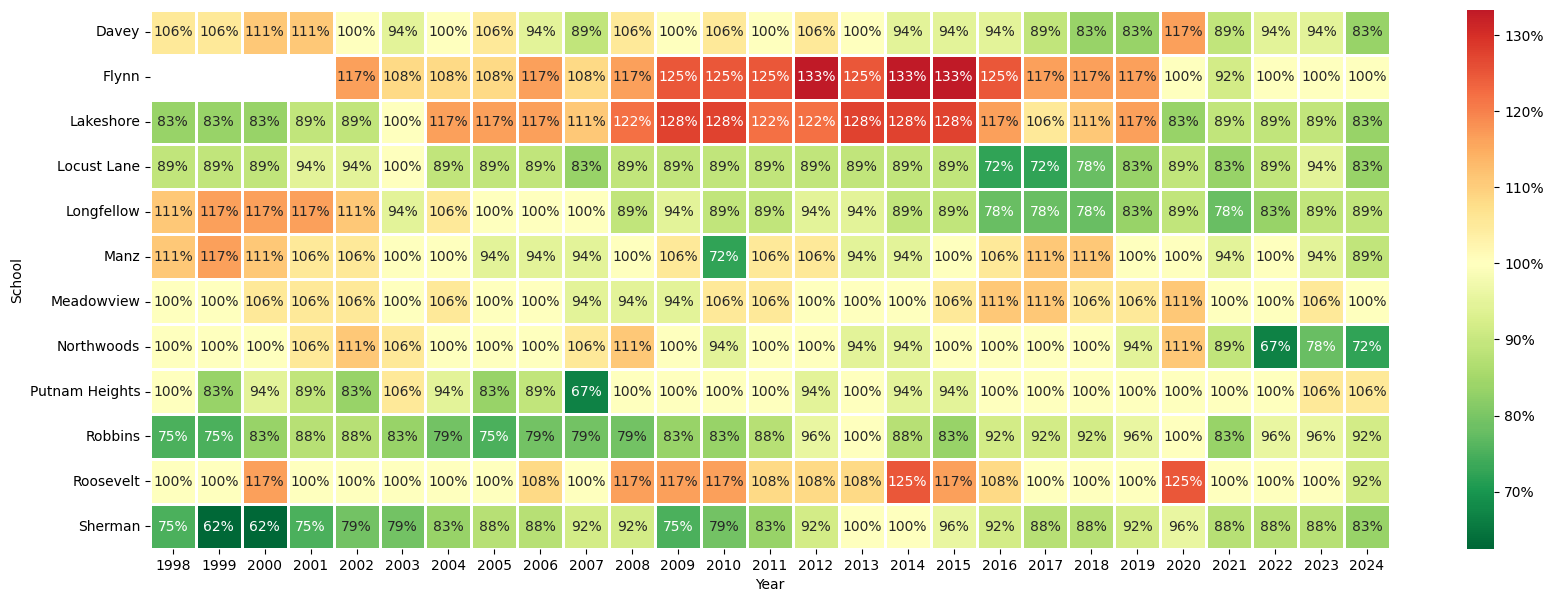

\pagebreak

In [9]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import seaborn as sns

classroom_utilization_per_school_year['Classroom Utilization Ratio'] = (classroom_utilization_per_school_year['Classrooms in Use'] / classroom_utilization_per_school_year['Available Classrooms'])
classroom_utilization_per_school_year['Classroom Utilization Percent'] = classroom_utilization_per_school_year['Classroom Utilization Ratio']

classroom_utilization_per_school_year = classroom_utilization_per_school_year[['Year','School','Classroom Utilization Percent']].set_index(['Year','School']).unstack()['Classroom Utilization Percent']

fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(
    classroom_utilization_per_school_year.T,
    center=1,
    annot=True,
    cmap="RdYlGn_r",
    ax=ax,
    fmt='.0%',
    cbar_kws={'format': FuncFormatter(lambda x,pos: '{:.0%}'.format(x))},
    linewidths=1
)

plt.yticks(rotation=0)
plt.show()
display(Markdown('\pagebreak'))

# Per-Grade Seat Usage Analysis
The Per-School Classroom Usage analysis provides a good snapshot of the amount of stress a schools enrollment numbers are causing, but it is a step-wise measurement. There are cases where an increase of students at one school will not affect this the classroom usage, but the same increase at another school will increase that schools classroom usage.

By measuring the number of seats in use, per-grade, against the available seats in the school, we can see how close schools are to needing additional classrooms.

*Editorial decision: I have selected a center of 85% for the heatmap color gradient.*

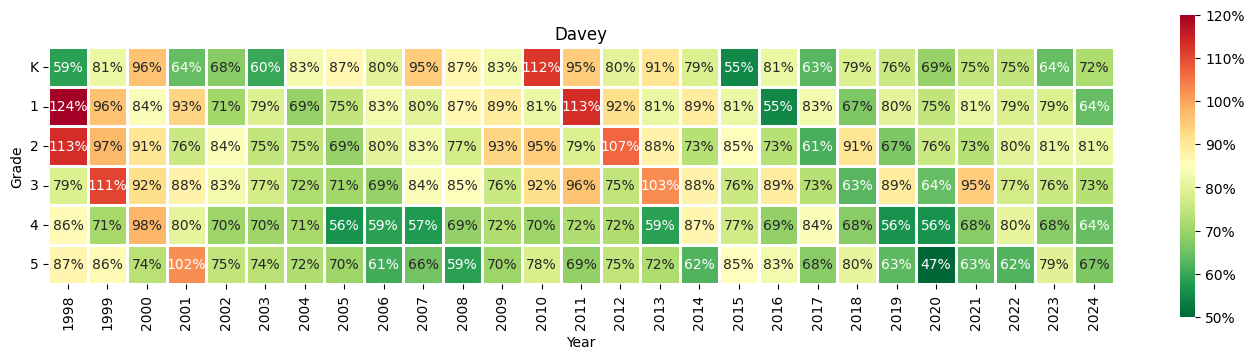

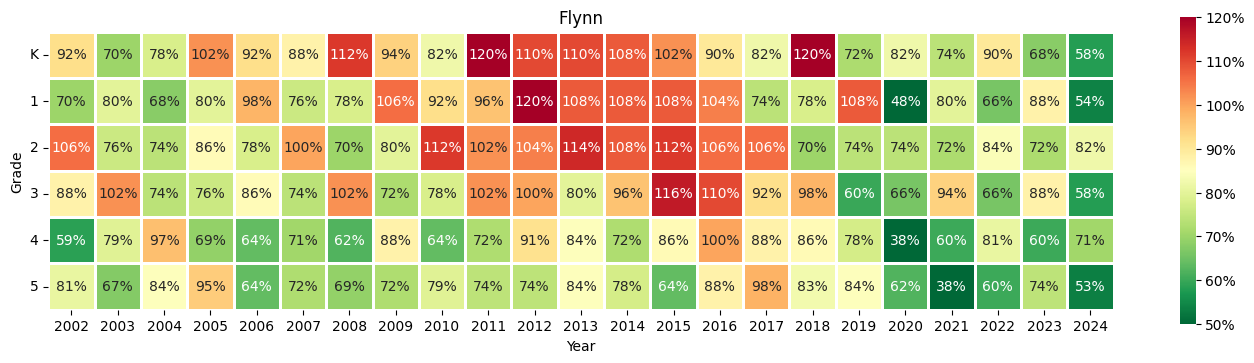

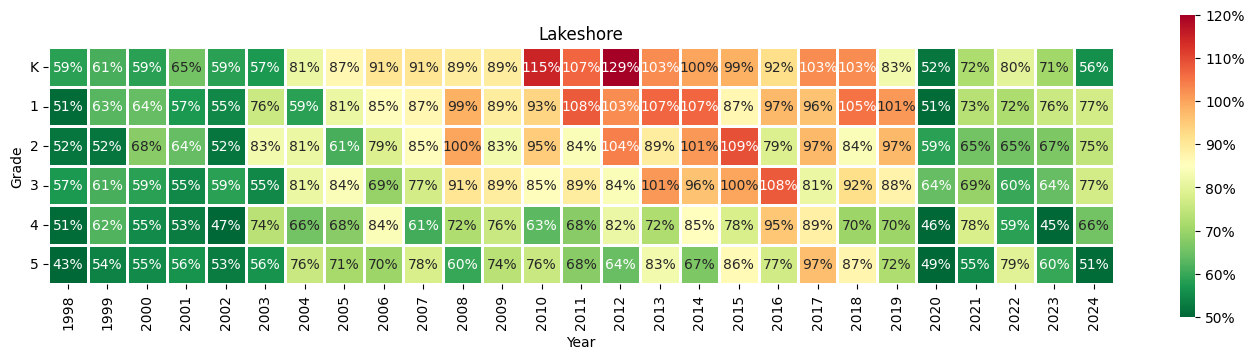

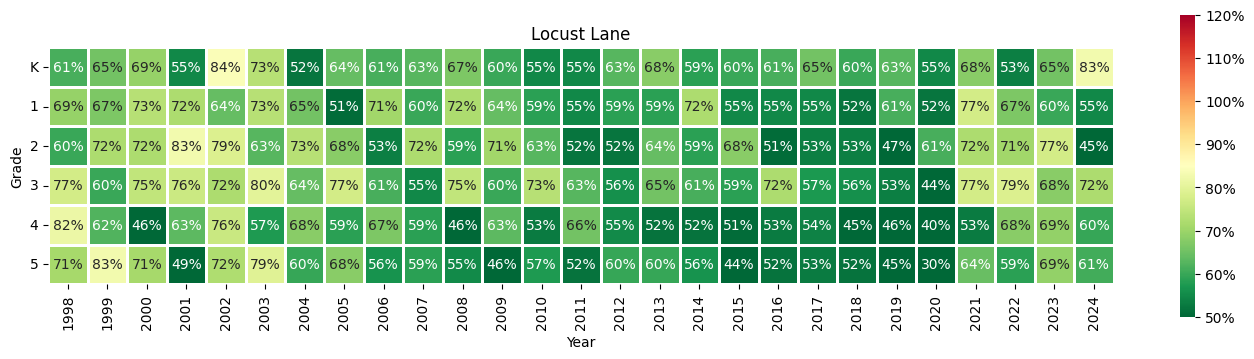

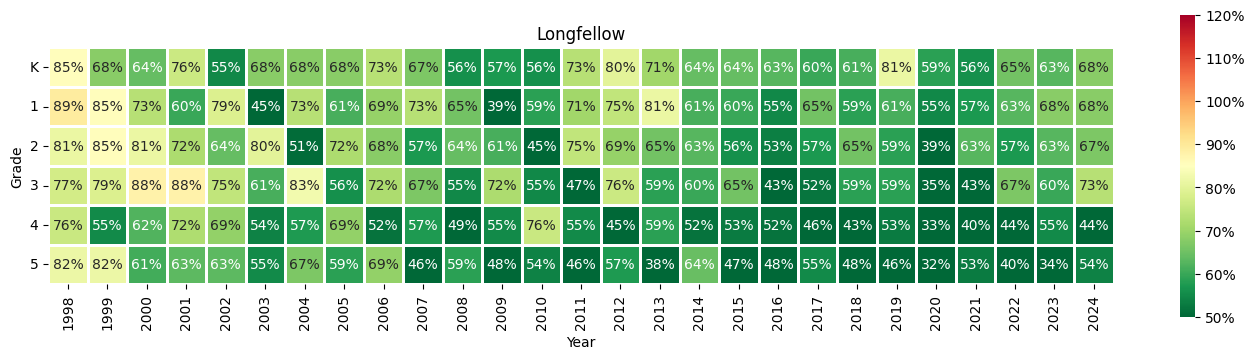

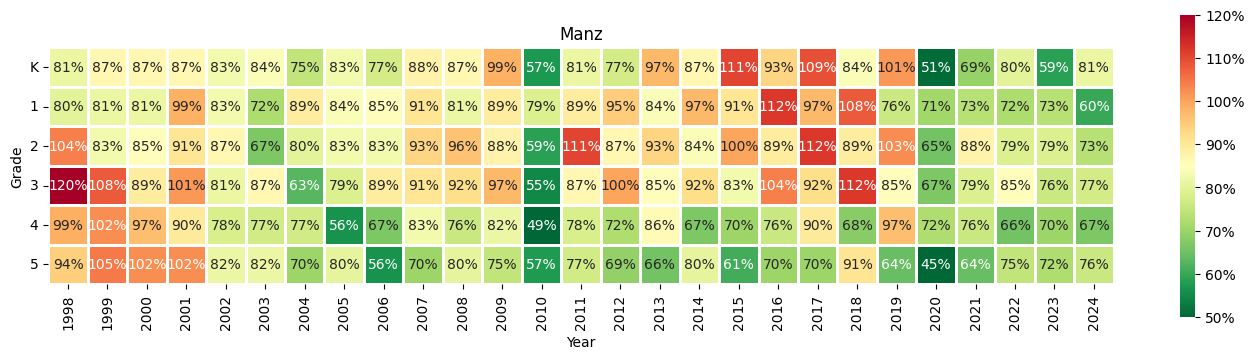

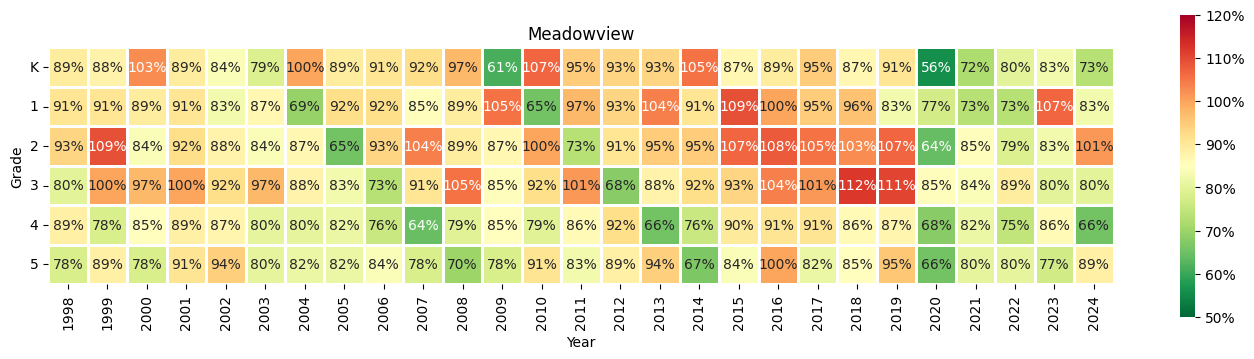

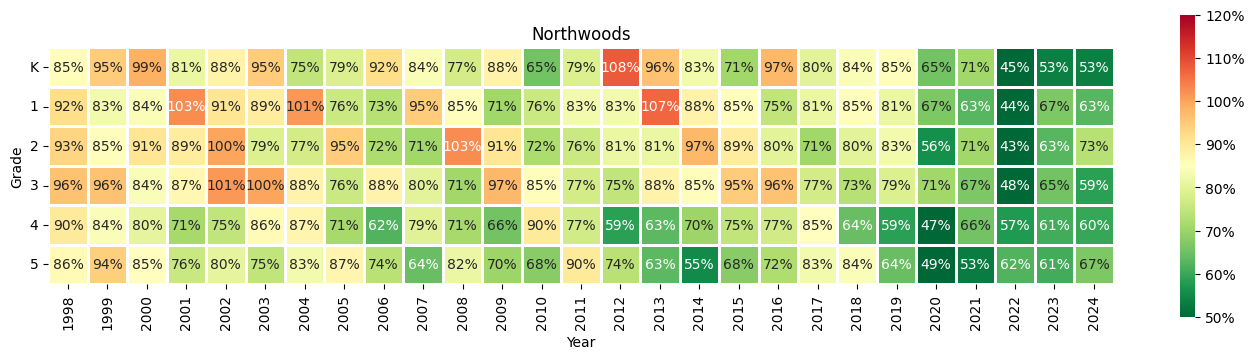

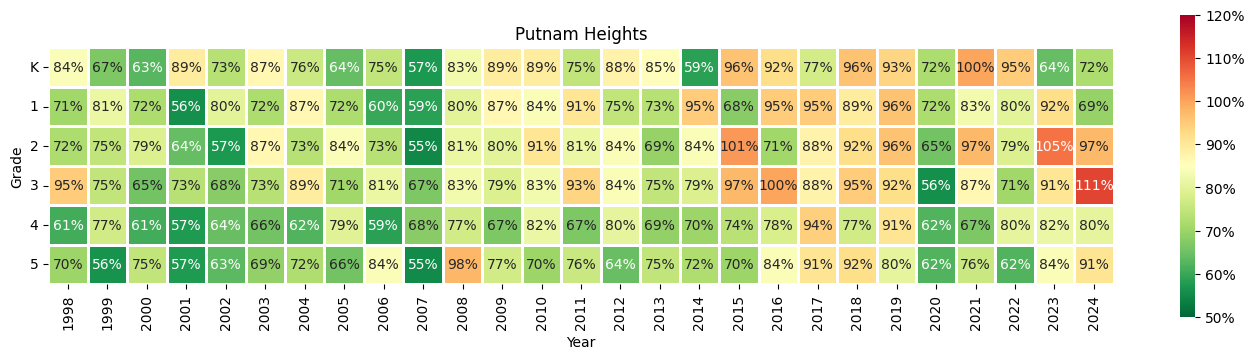

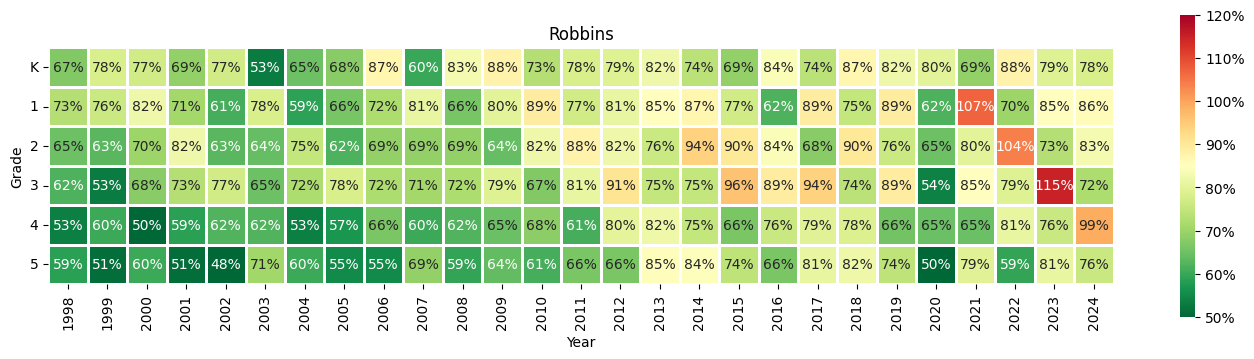

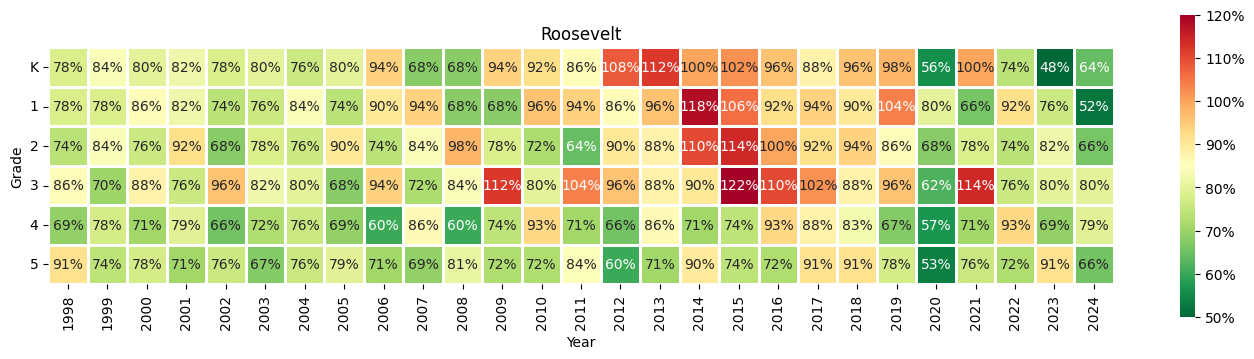

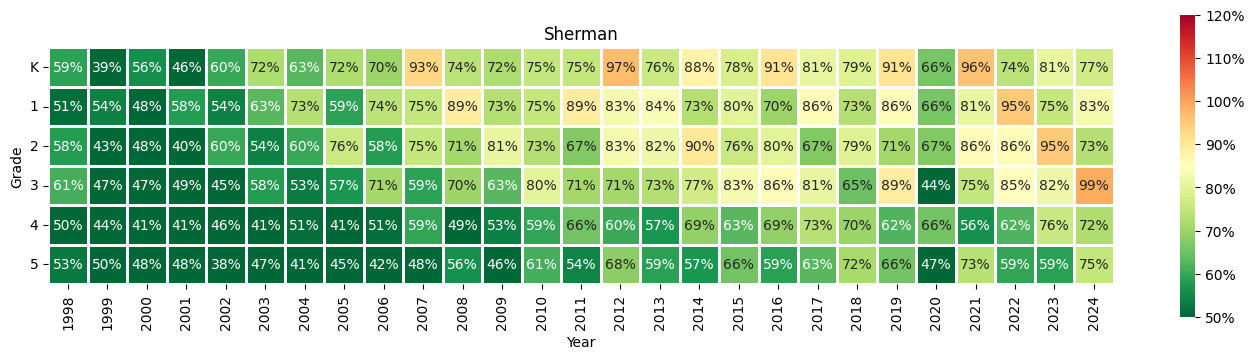

In [10]:
school_grade_capacity = pd.DataFrame([
    ('Davey','Grade K',75),('Davey','Grade 1',75),('Davey','Grade 2',75),('Davey','Grade 3',75),('Davey','Grade 4',87),('Davey','Grade 5',87),
    ('Flynn','Grade K',50),('Flynn','Grade 1',50),('Flynn','Grade 2',50),('Flynn','Grade 3',50),('Flynn','Grade 4',58),('Flynn','Grade 5',58),
    ('Lakeshore','Grade K',75),('Lakeshore','Grade 1',75),('Lakeshore','Grade 2',75),('Lakeshore','Grade 3',75),('Lakeshore','Grade 4',87),('Lakeshore','Grade 5',87),
    ('Locust Lane','Grade K',75),('Locust Lane','Grade 1',75),('Locust Lane','Grade 2',75),('Locust Lane','Grade 3',75),('Locust Lane','Grade 4',87),('Locust Lane','Grade 5',87),
    ('Longfellow','Grade K',75),('Longfellow','Grade 1',75),('Longfellow','Grade 2',75),('Longfellow','Grade 3',75),('Longfellow','Grade 4',87),('Longfellow','Grade 5',87),
    ('Manz','Grade K',75),('Manz','Grade 1',75),('Manz','Grade 2',75),('Manz','Grade 3',75),('Manz','Grade 4',87),('Manz','Grade 5',87),
    ('Meadowview','Grade K',75),('Meadowview','Grade 1',75),('Meadowview','Grade 2',75),('Meadowview','Grade 3',75),('Meadowview','Grade 4',87),('Meadowview','Grade 5',87),
    ('Northwoods','Grade K',75),('Northwoods','Grade 1',75),('Northwoods','Grade 2',75),('Northwoods','Grade 3',75),('Northwoods','Grade 4',87),('Northwoods','Grade 5',87),
    ('Putnam Heights','Grade K',75),('Putnam Heights','Grade 1',75),('Putnam Heights','Grade 2',75),('Putnam Heights','Grade 3',75),('Putnam Heights','Grade 4',87),('Putnam Heights','Grade 5',87),
    ('Robbins','Grade K',100),('Robbins','Grade 1',100),('Robbins','Grade 2',100),('Robbins','Grade 3',100),('Robbins','Grade 4',116),('Robbins','Grade 5',116),
    ('Roosevelt','Grade K',50),('Roosevelt','Grade 1',50),('Roosevelt','Grade 2',50),('Roosevelt','Grade 3',50),('Roosevelt','Grade 4',58),('Roosevelt','Grade 5',58),
    ('Sherman','Grade K',100),('Sherman','Grade 1',100),('Sherman','Grade 2',100),('Sherman','Grade 3',100),('Sherman','Grade 4',116),('Sherman','Grade 5',116)
], columns=['School','Grade','Maximum Capacity'])

school_grade_capacity['Grade Order'] = school_grade_capacity['Grade'].map({'Grade K': 0, 'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5})
school_grade_capacity['Grade'] = school_grade_capacity['Grade'].map({'Grade K': 'K', 'Grade 1': '1', 'Grade 2': '2', 'Grade 3': '3', 'Grade 4': '4', 'Grade 5': '5'})

students_per_grade = enrollment.groupby(['Year','School','Grade'], observed=True).sum(numeric_only=True).reset_index().merge(school_grade_capacity)

students_per_grade['Capacity Ratio'] = students_per_grade['Students'] / students_per_grade['Maximum Capacity']
students_per_grade['Capacity Ratio'] = students_per_grade['Capacity Ratio']

for school_name, school_capacity_ratio in students_per_grade.groupby('School'):
    fig, ax = plt.subplots(figsize=(14,3.6))

    school_capacity_ratio = school_capacity_ratio[school_capacity_ratio["Students"] != 0]

    sns.heatmap(
        school_capacity_ratio.sort_values(['Year', 'Grade Order']).pivot(columns="Grade", index="Year", values="Capacity Ratio")[['K', '1', '2', '3', '4', '5']].T,
        center=.85,
        annot=True,
        cmap="RdYlGn_r",
        fmt='.0%',
        cbar_kws={'format': FuncFormatter(lambda x,pos: '{:.0%}'.format(x))},
        ax=ax,
        linewidths=1,
        square=True,
        vmin=.5,
        vmax=1.2,
    )
    ax.set_title(school_name)

    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

### Observations
The district classroom size guidelines difference for K-3 and 4-5 are clearly visible in the heatmap.

Schools under stress -- Manz, Meadowview, Putnam Heights, and Roosevelt -- are easily identified by their heatmaps.

Cohort groups are easily identified by their diagonal progression in the heatmap.

# Cohort Counts
Cohort analysis is frequently used by school districts to make projections.

## District

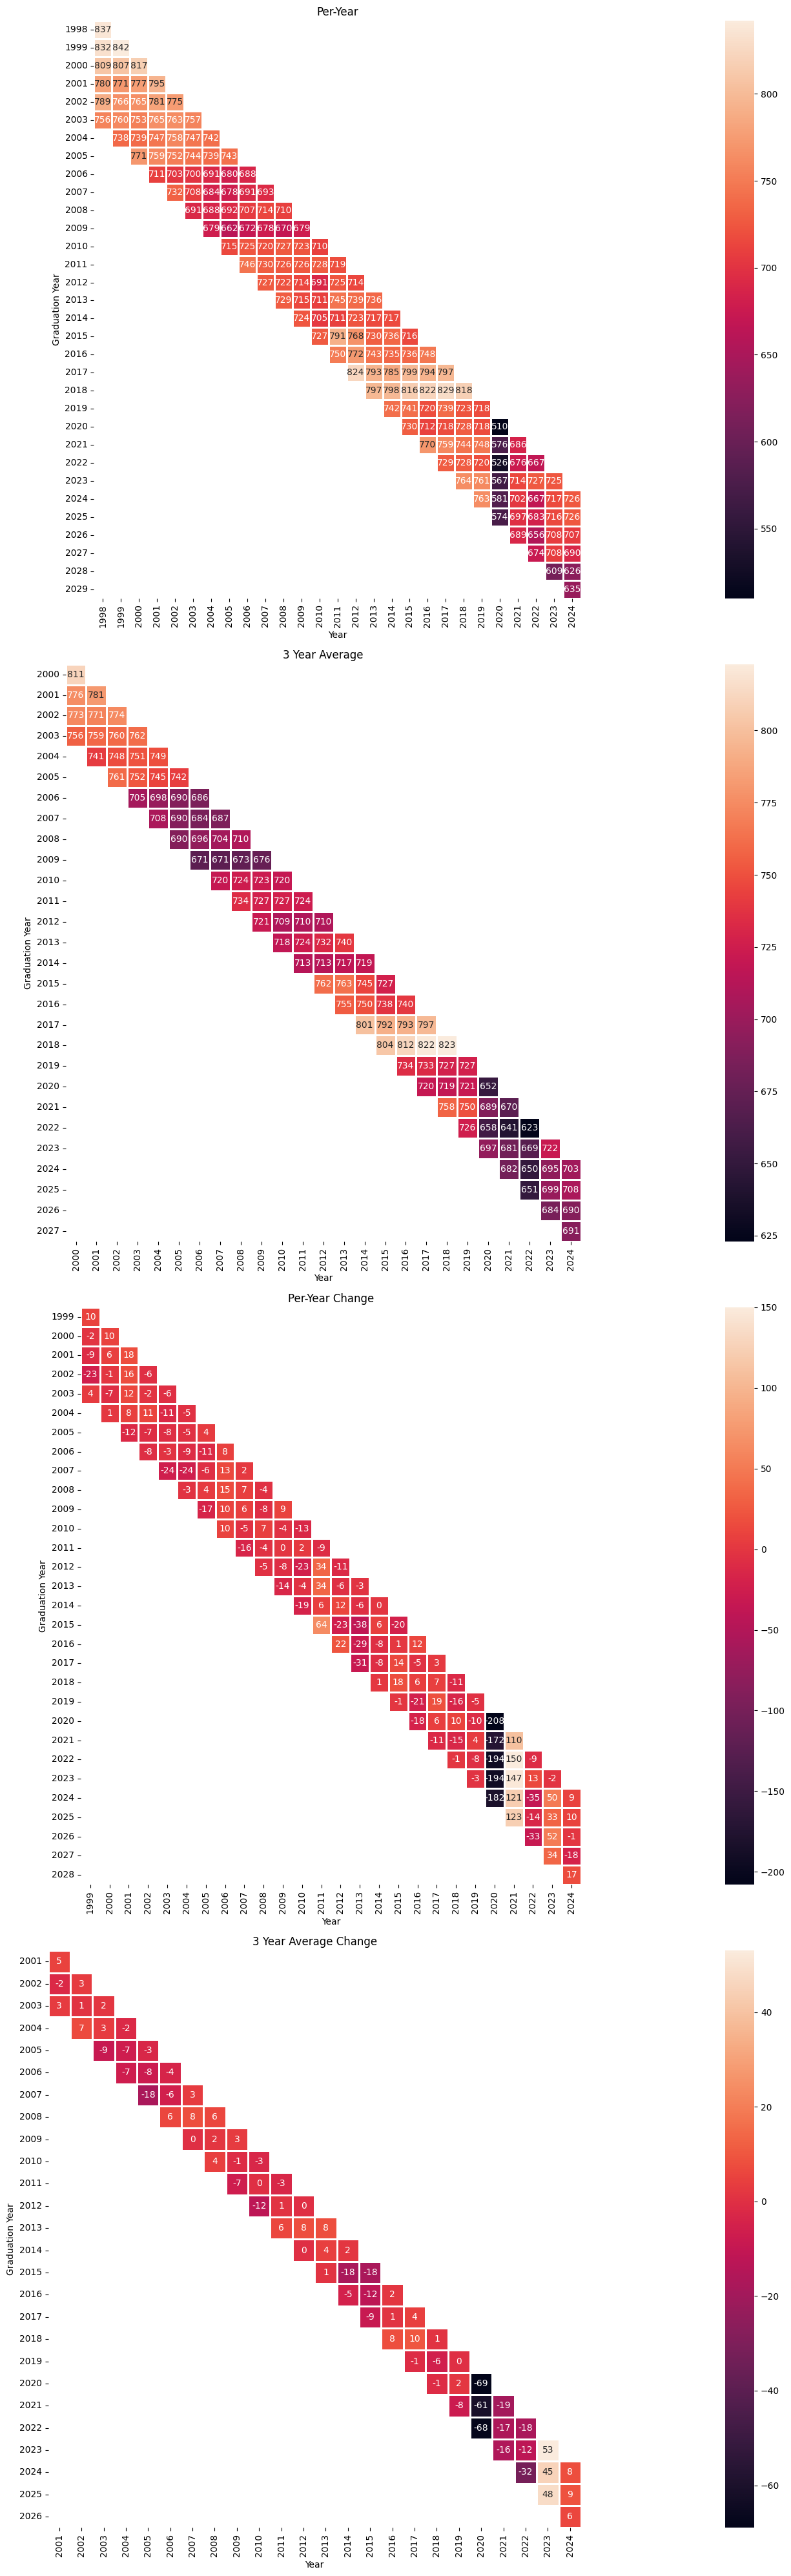

In [ ]:
cohort_group_sum = enrollment.groupby(['Graduation Year', 'Year'])['Students'].sum().astype('int').dropna()
cohort_group_sum = cohort_group_sum[cohort_group_sum != 0]

cohort_group_rolling_mean = cohort_group_sum.groupby(level=0).rolling(window=3, min_periods=3).mean().round(0).droplevel(0).dropna()

display(Markdown('## District'))

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, figsize=(45, 45))
ax1.set_title('Per-Year')
ax2.set_title('3 Year Average')
ax3.set_title('Per-Year Change')
ax4.set_title('3 Year Average Change')

sns.heatmap(cohort_group_sum.unstack(), annot=True, fmt='g', ax=ax1, yticklabels=True, linewidths=1, square=True)
sns.heatmap(cohort_group_rolling_mean.unstack(), annot=True, fmt='g', ax=ax2, yticklabels=True, linewidths=1, square=True)

sns.heatmap(cohort_group_sum.groupby(level=0).diff().dropna().unstack(), annot=True, fmt='g', ax=ax3, yticklabels=True, linewidths=1, square=True)
sns.heatmap(cohort_group_rolling_mean.groupby(level=0).diff().dropna().unstack(), annot=True, fmt='g', ax=ax4, yticklabels=True, linewidths=1, square=True)

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Davey

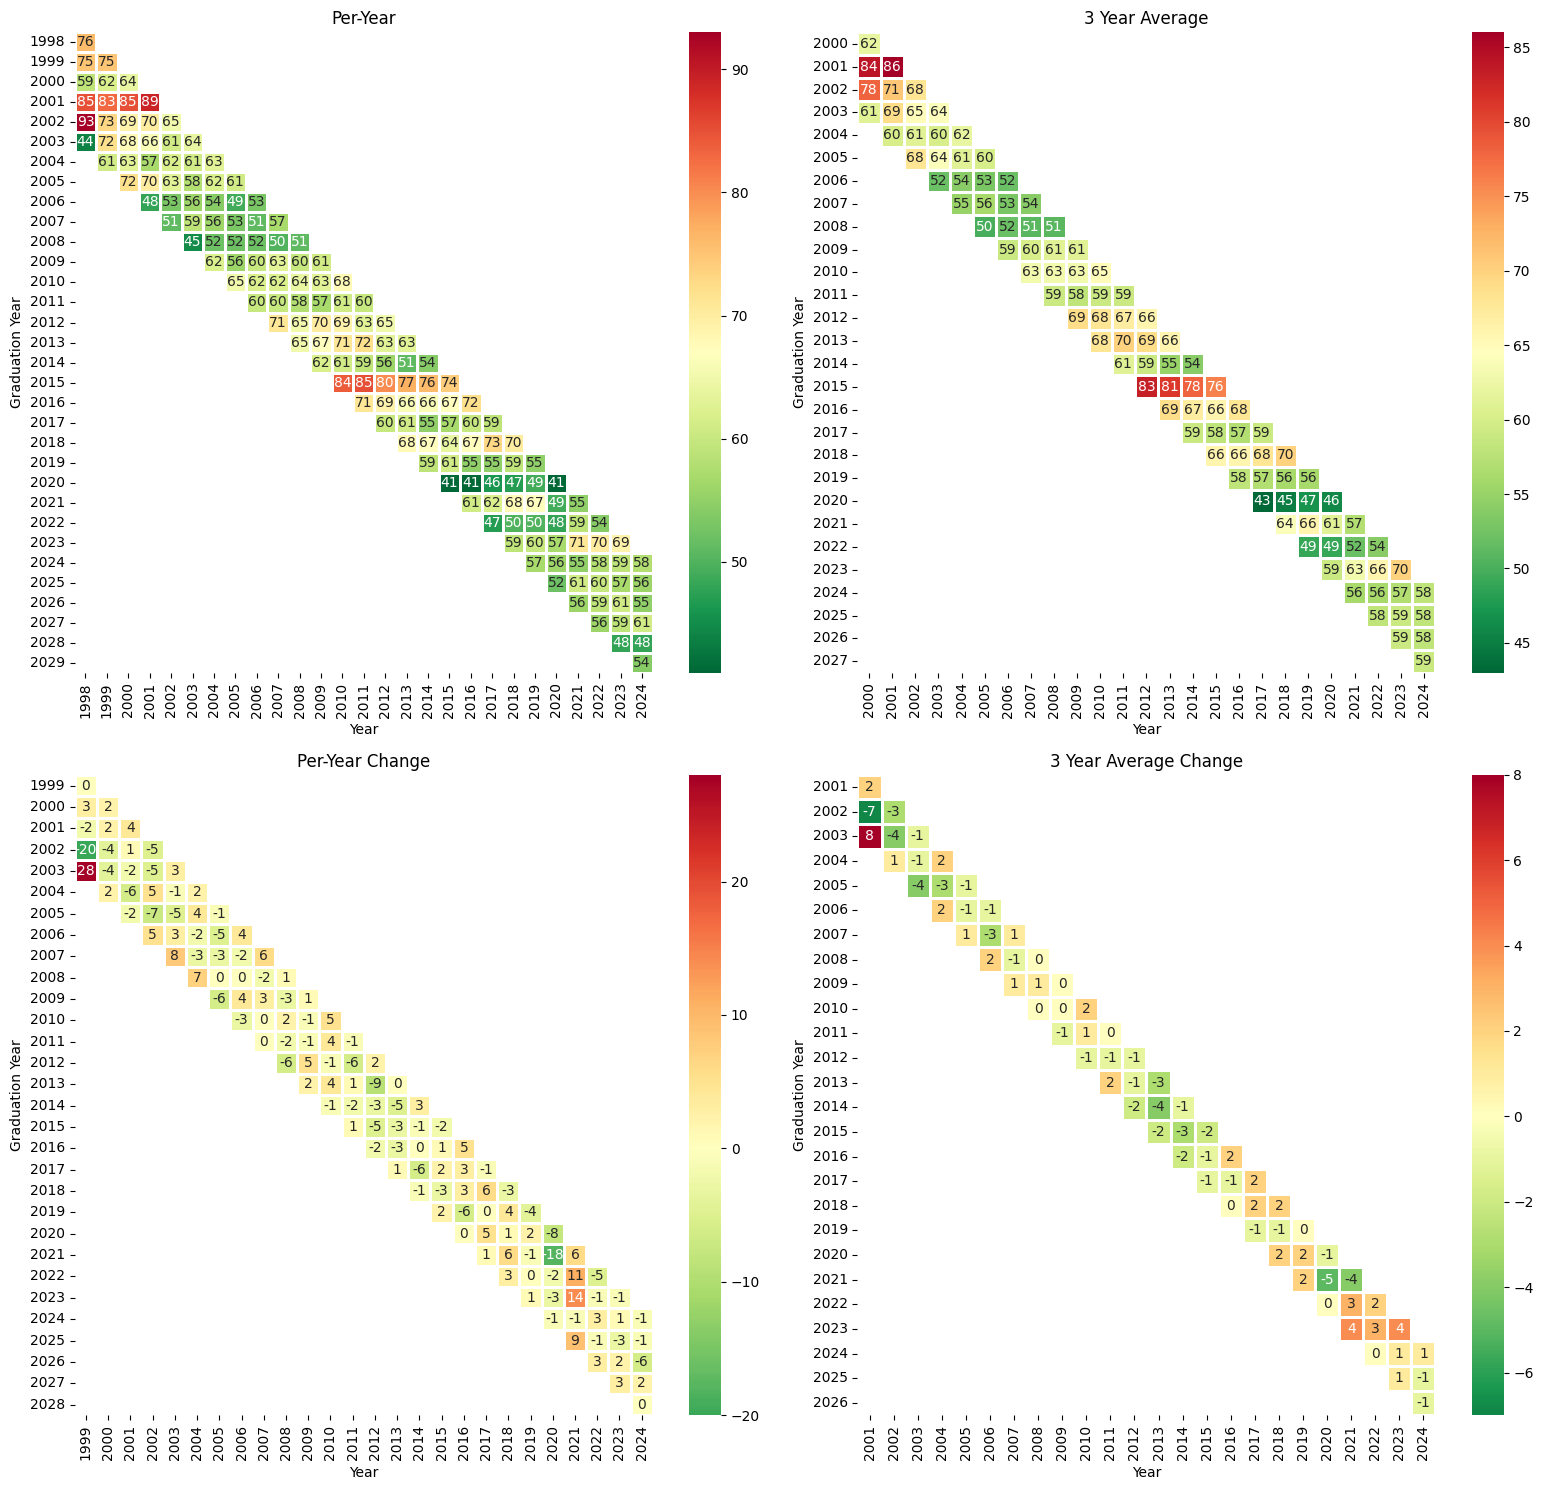

## Flynn

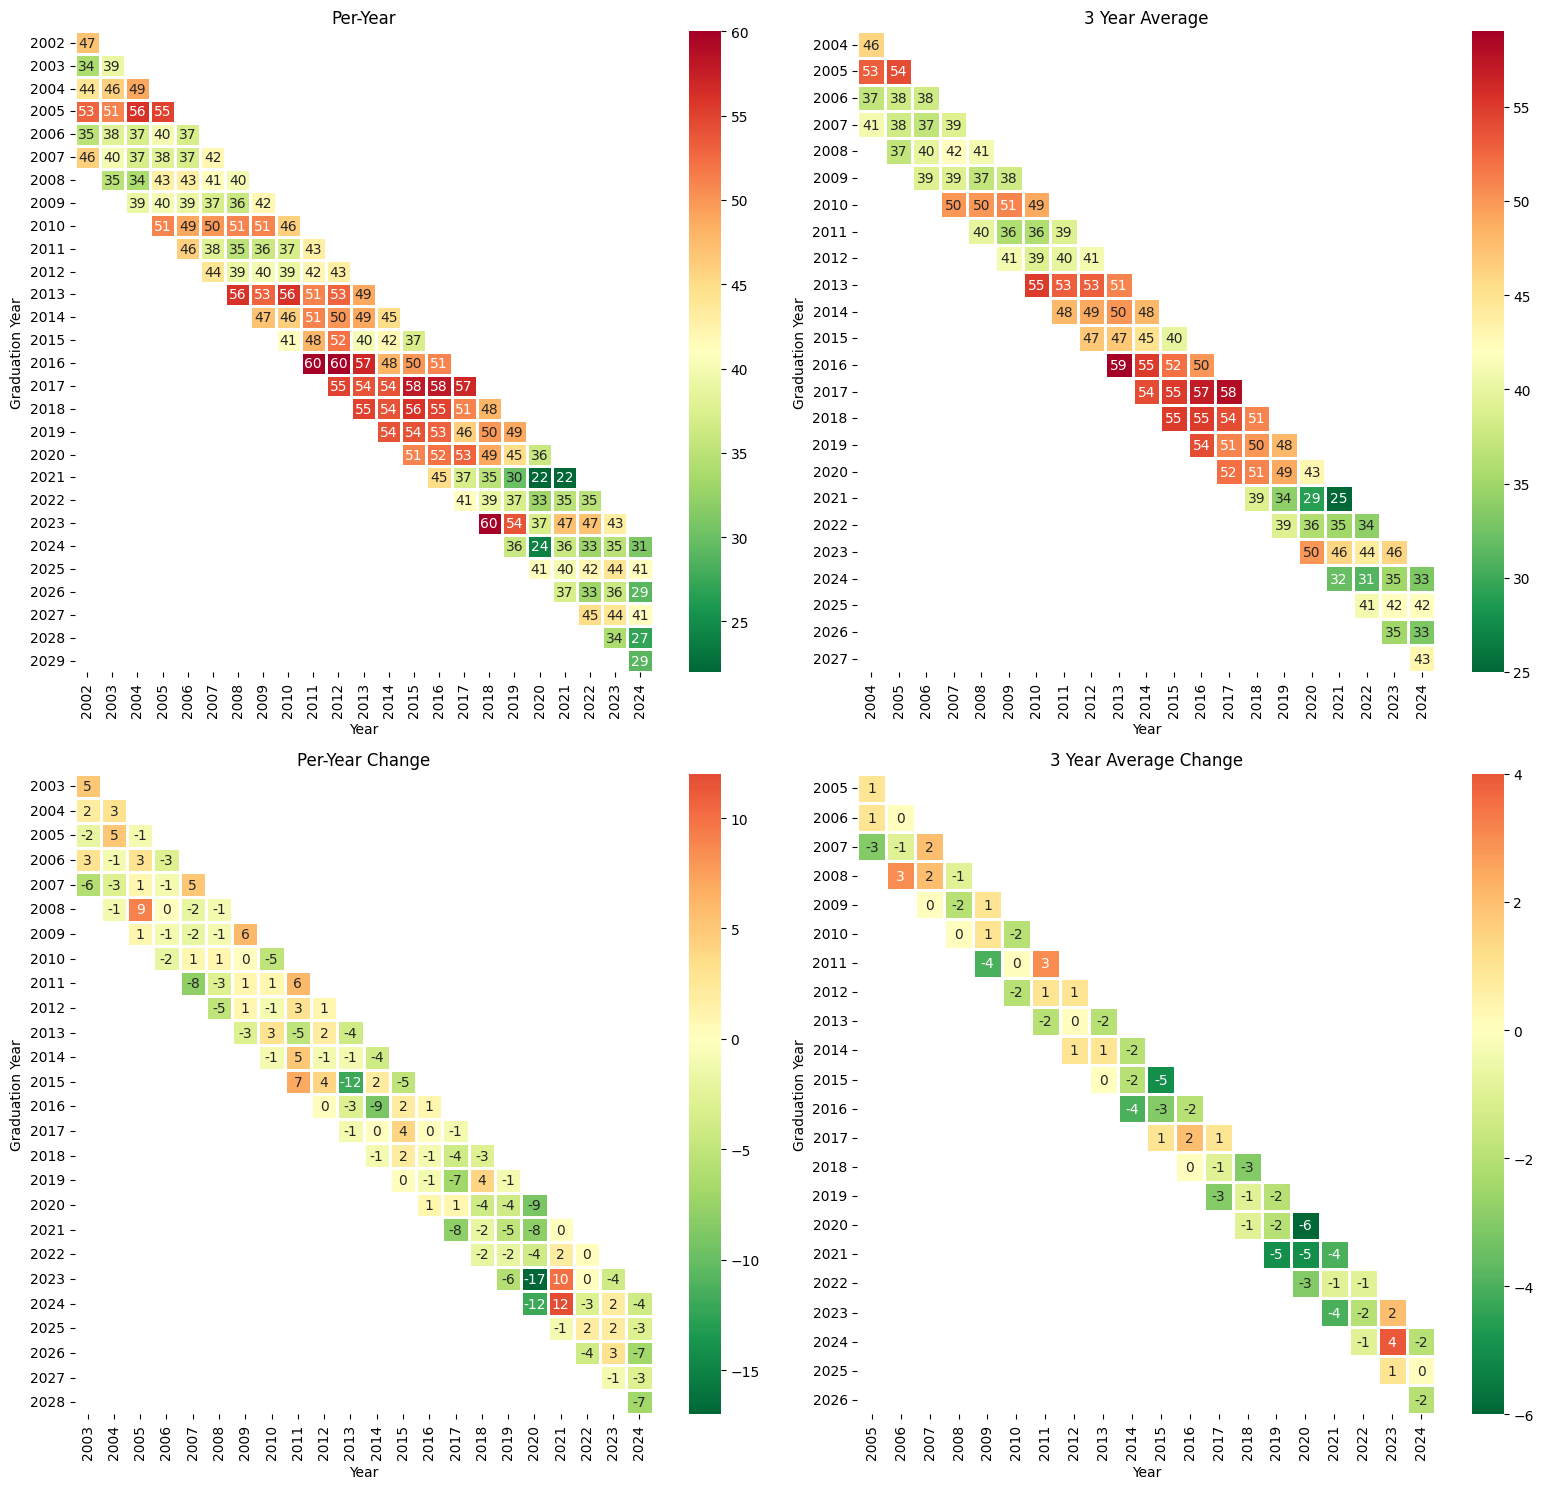

## Lakeshore

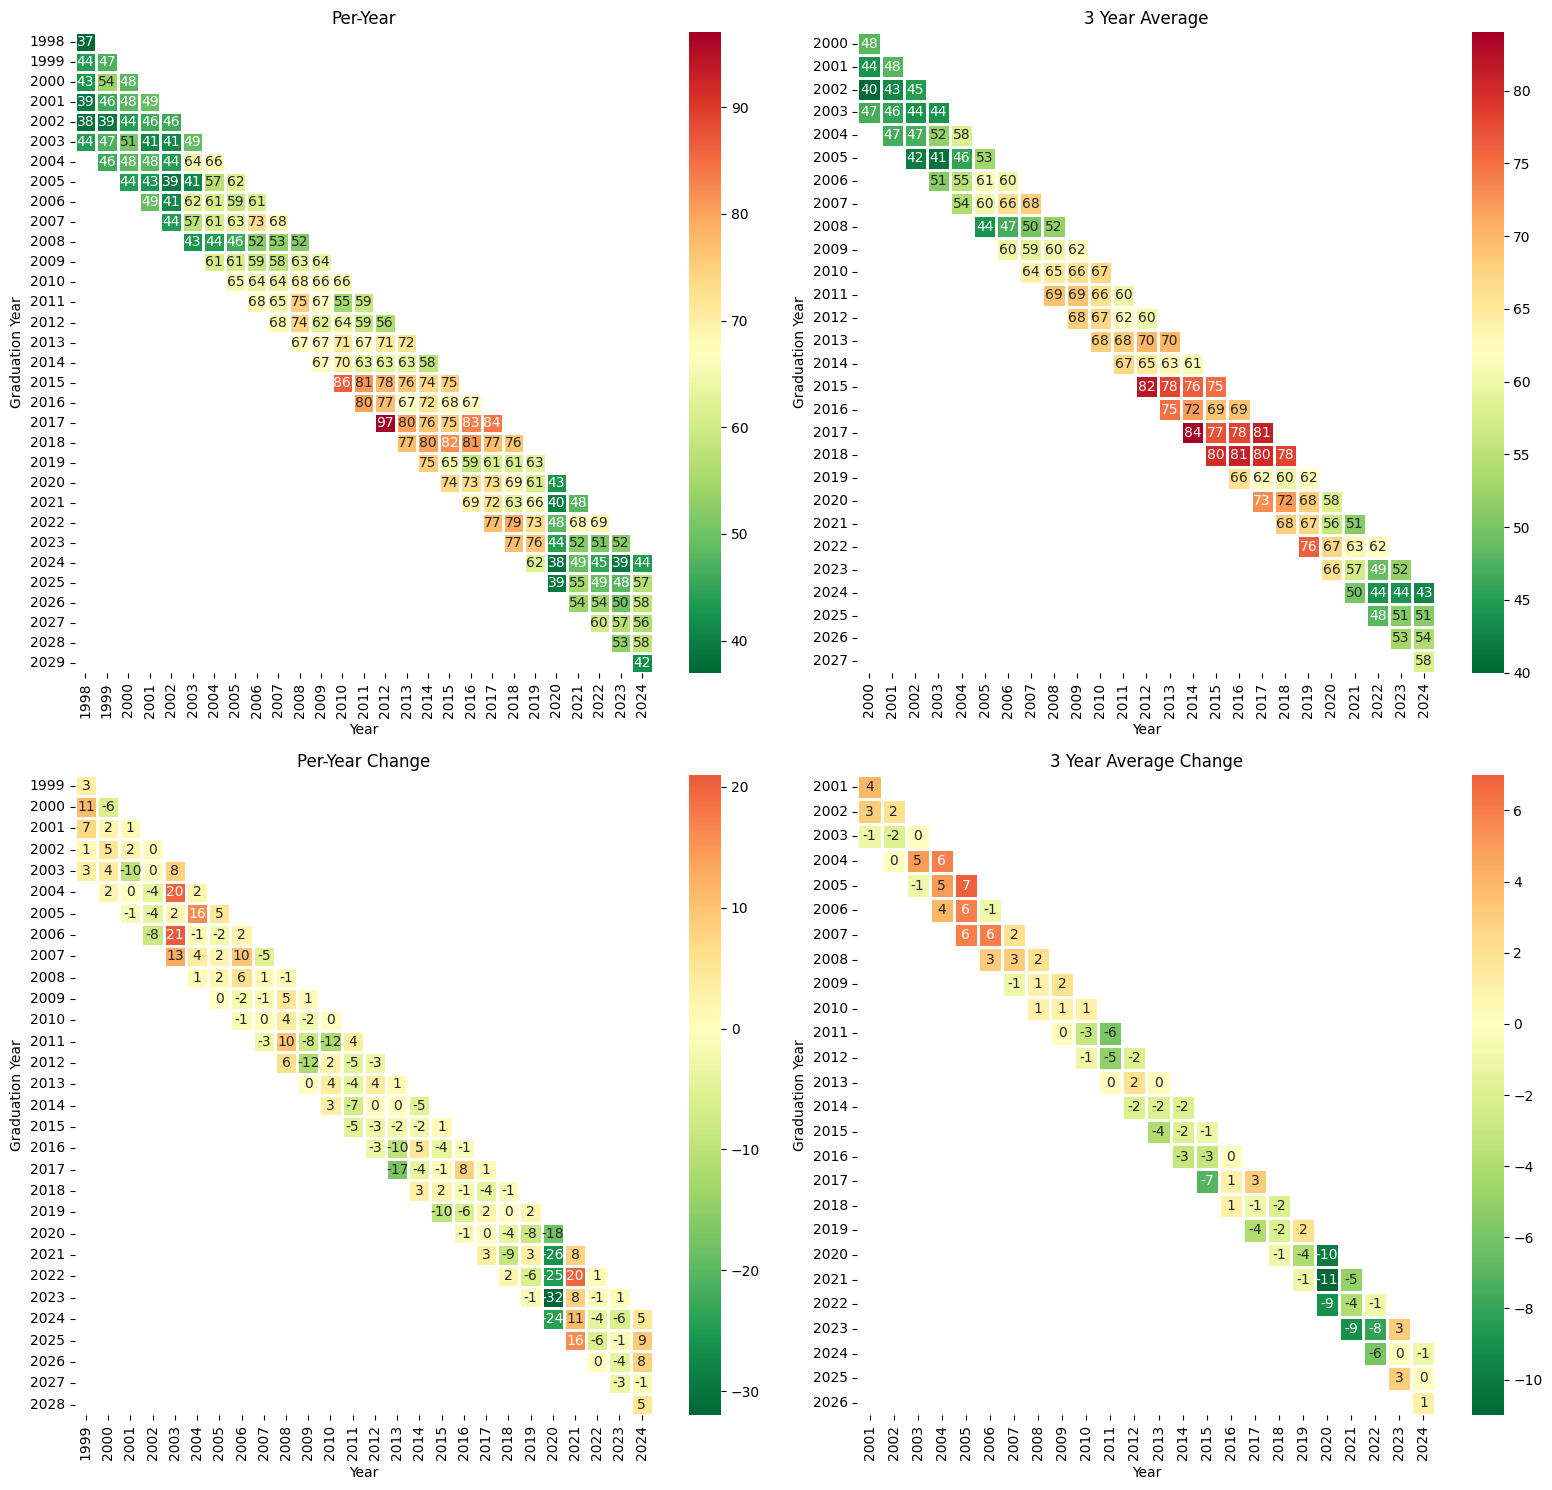

## Locust Lane

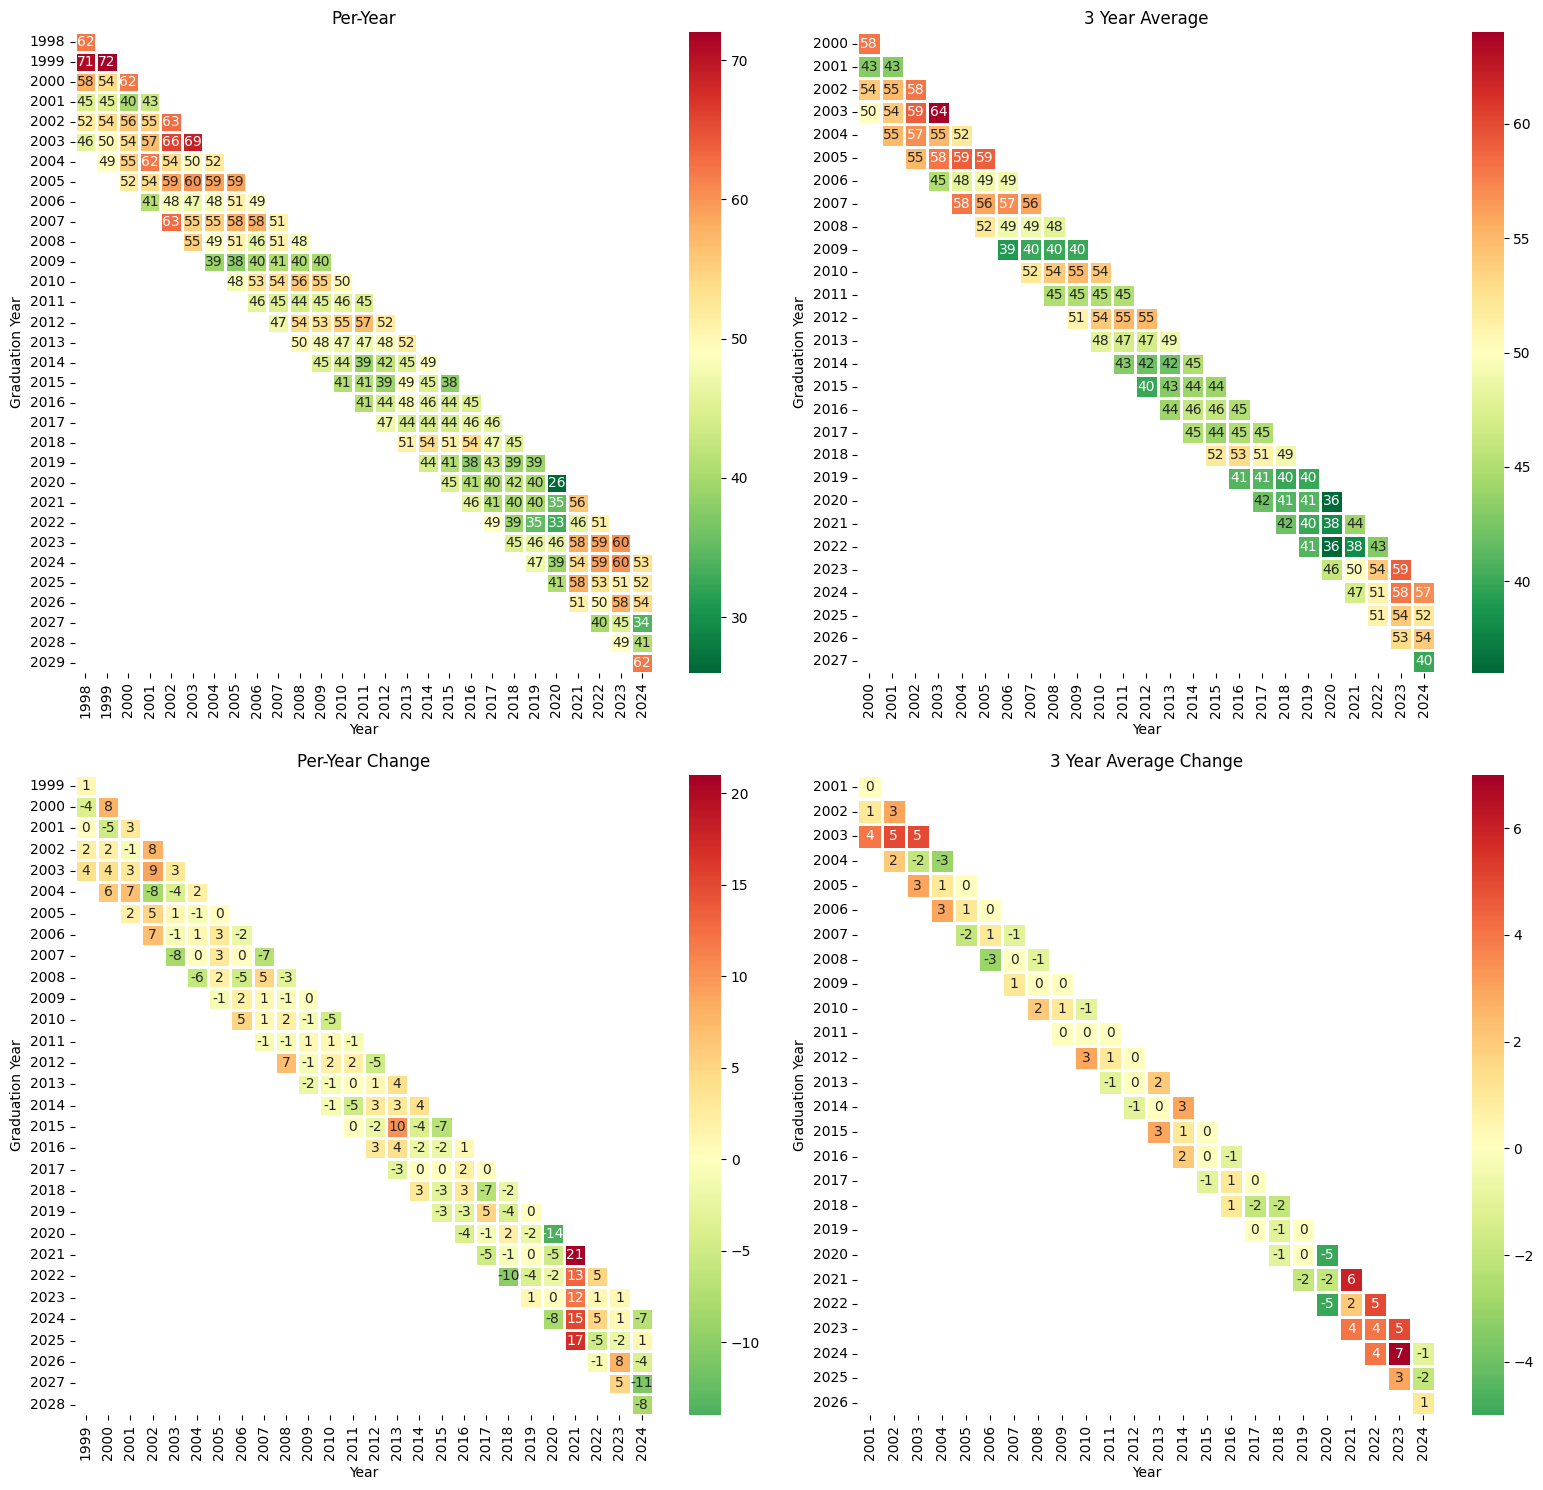

## Longfellow

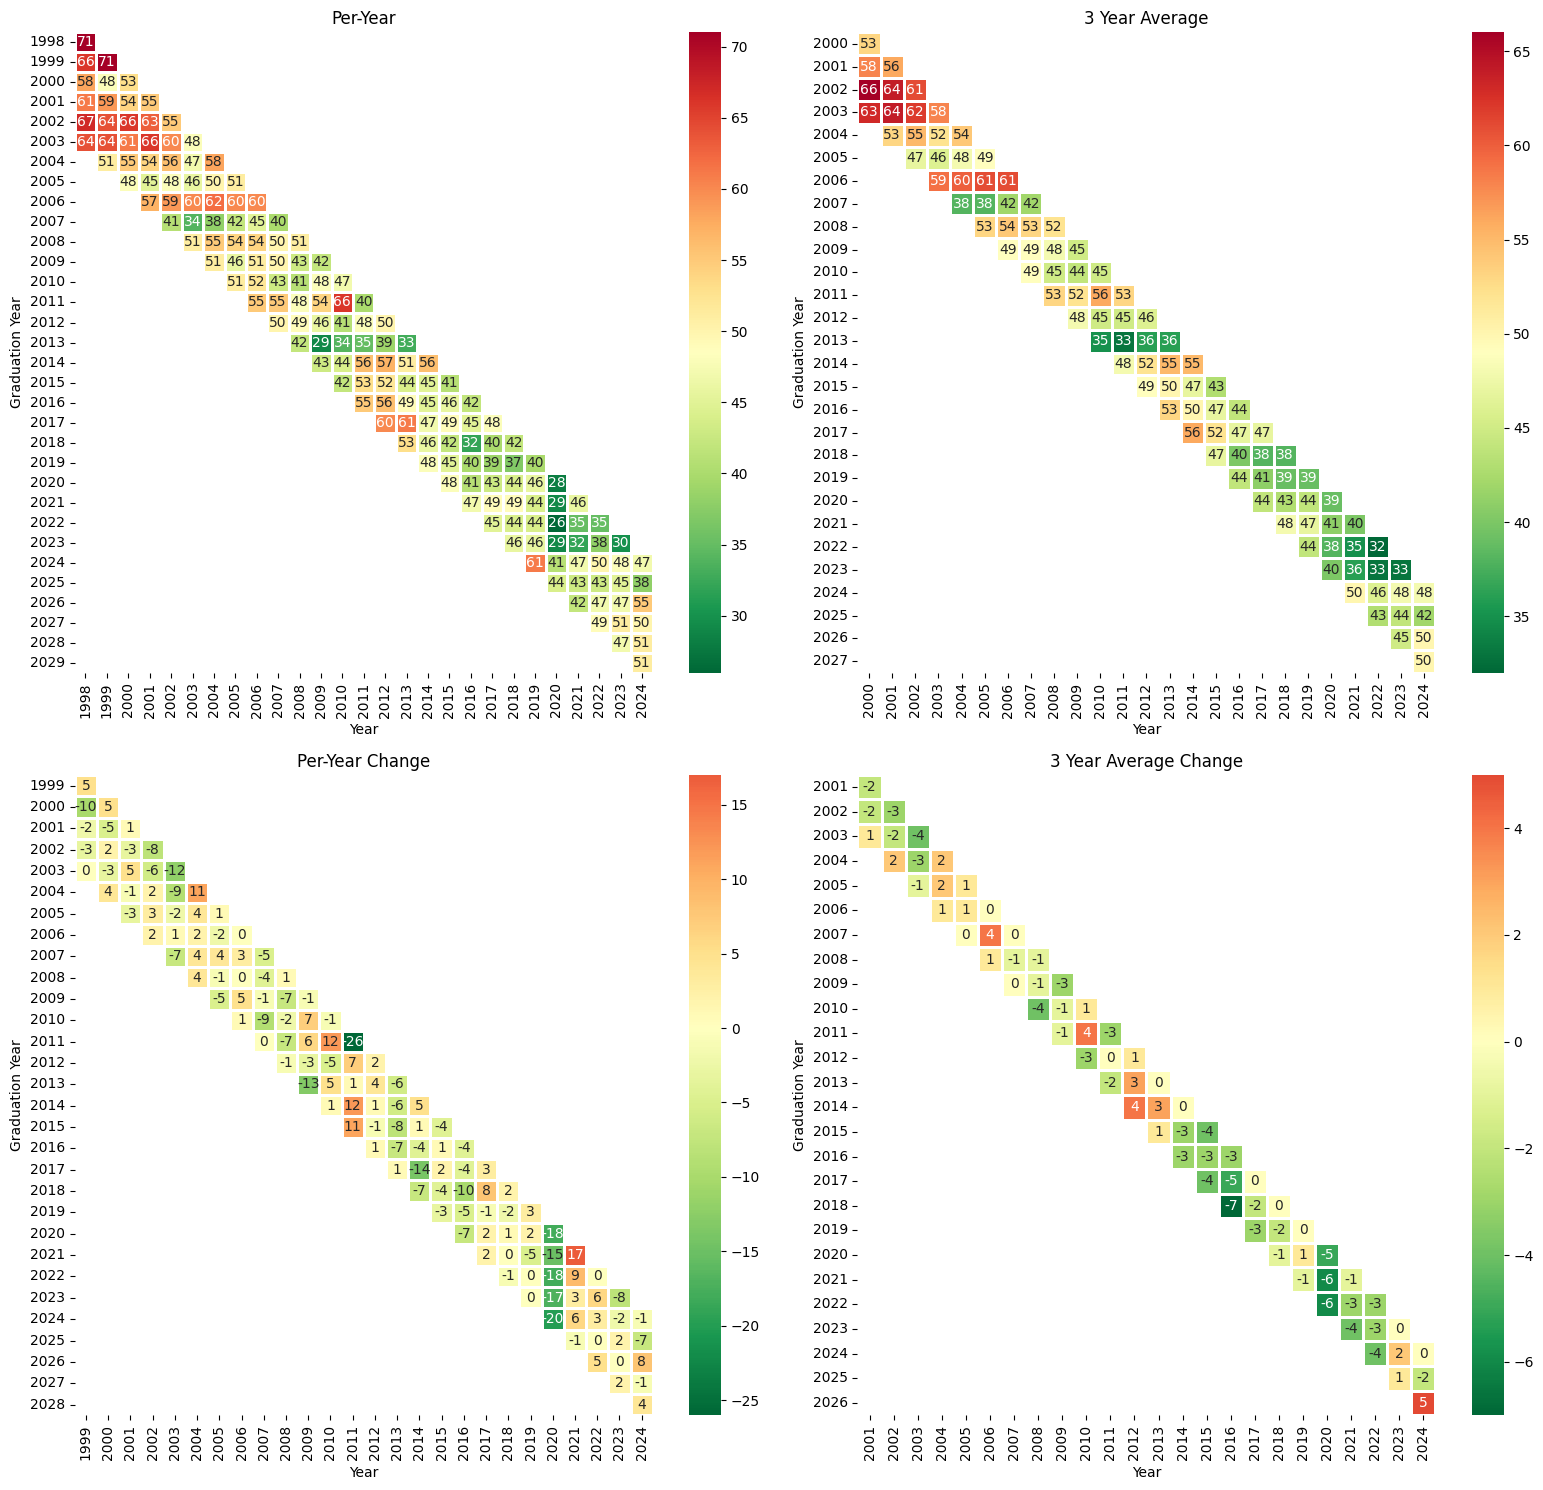

## Manz

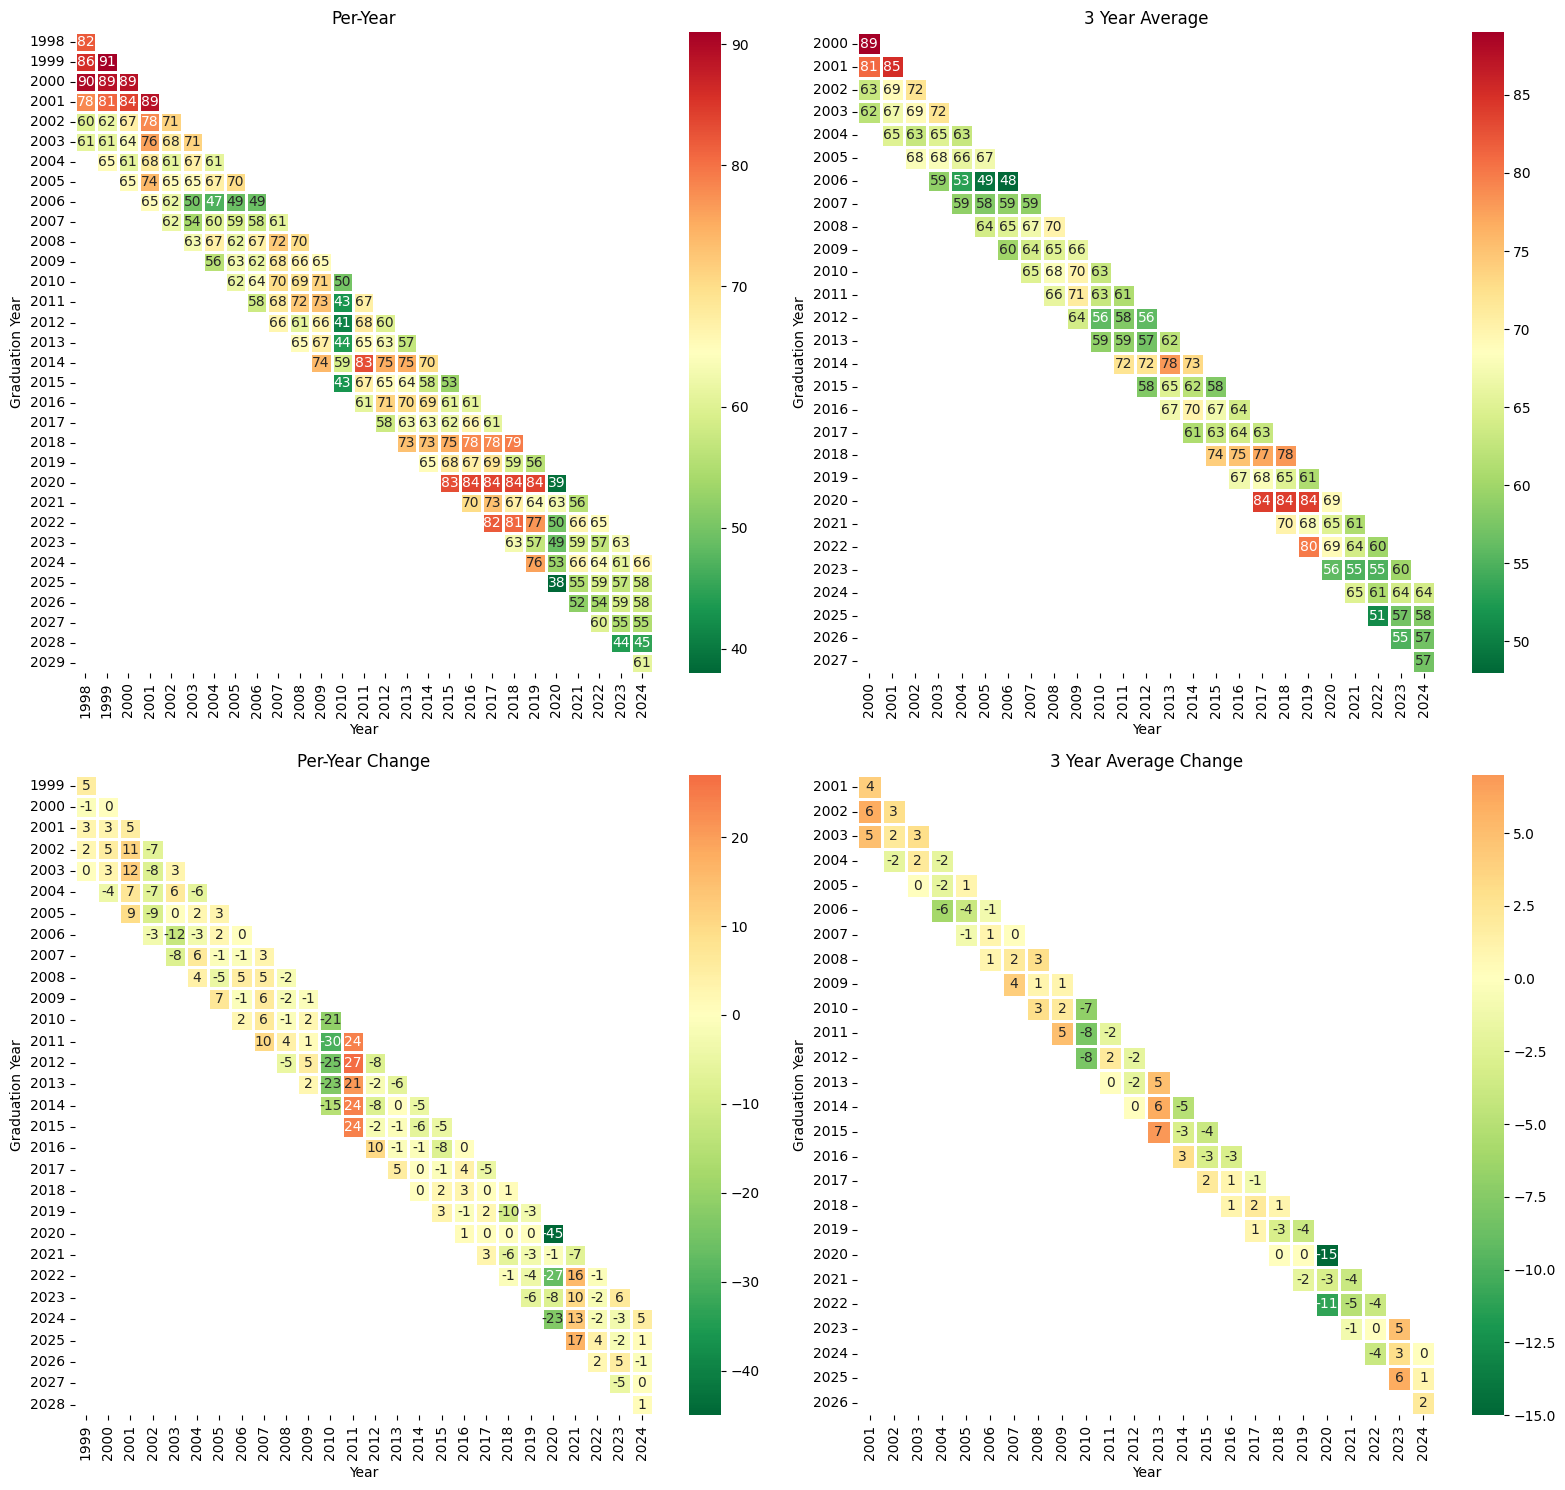

## Meadowview

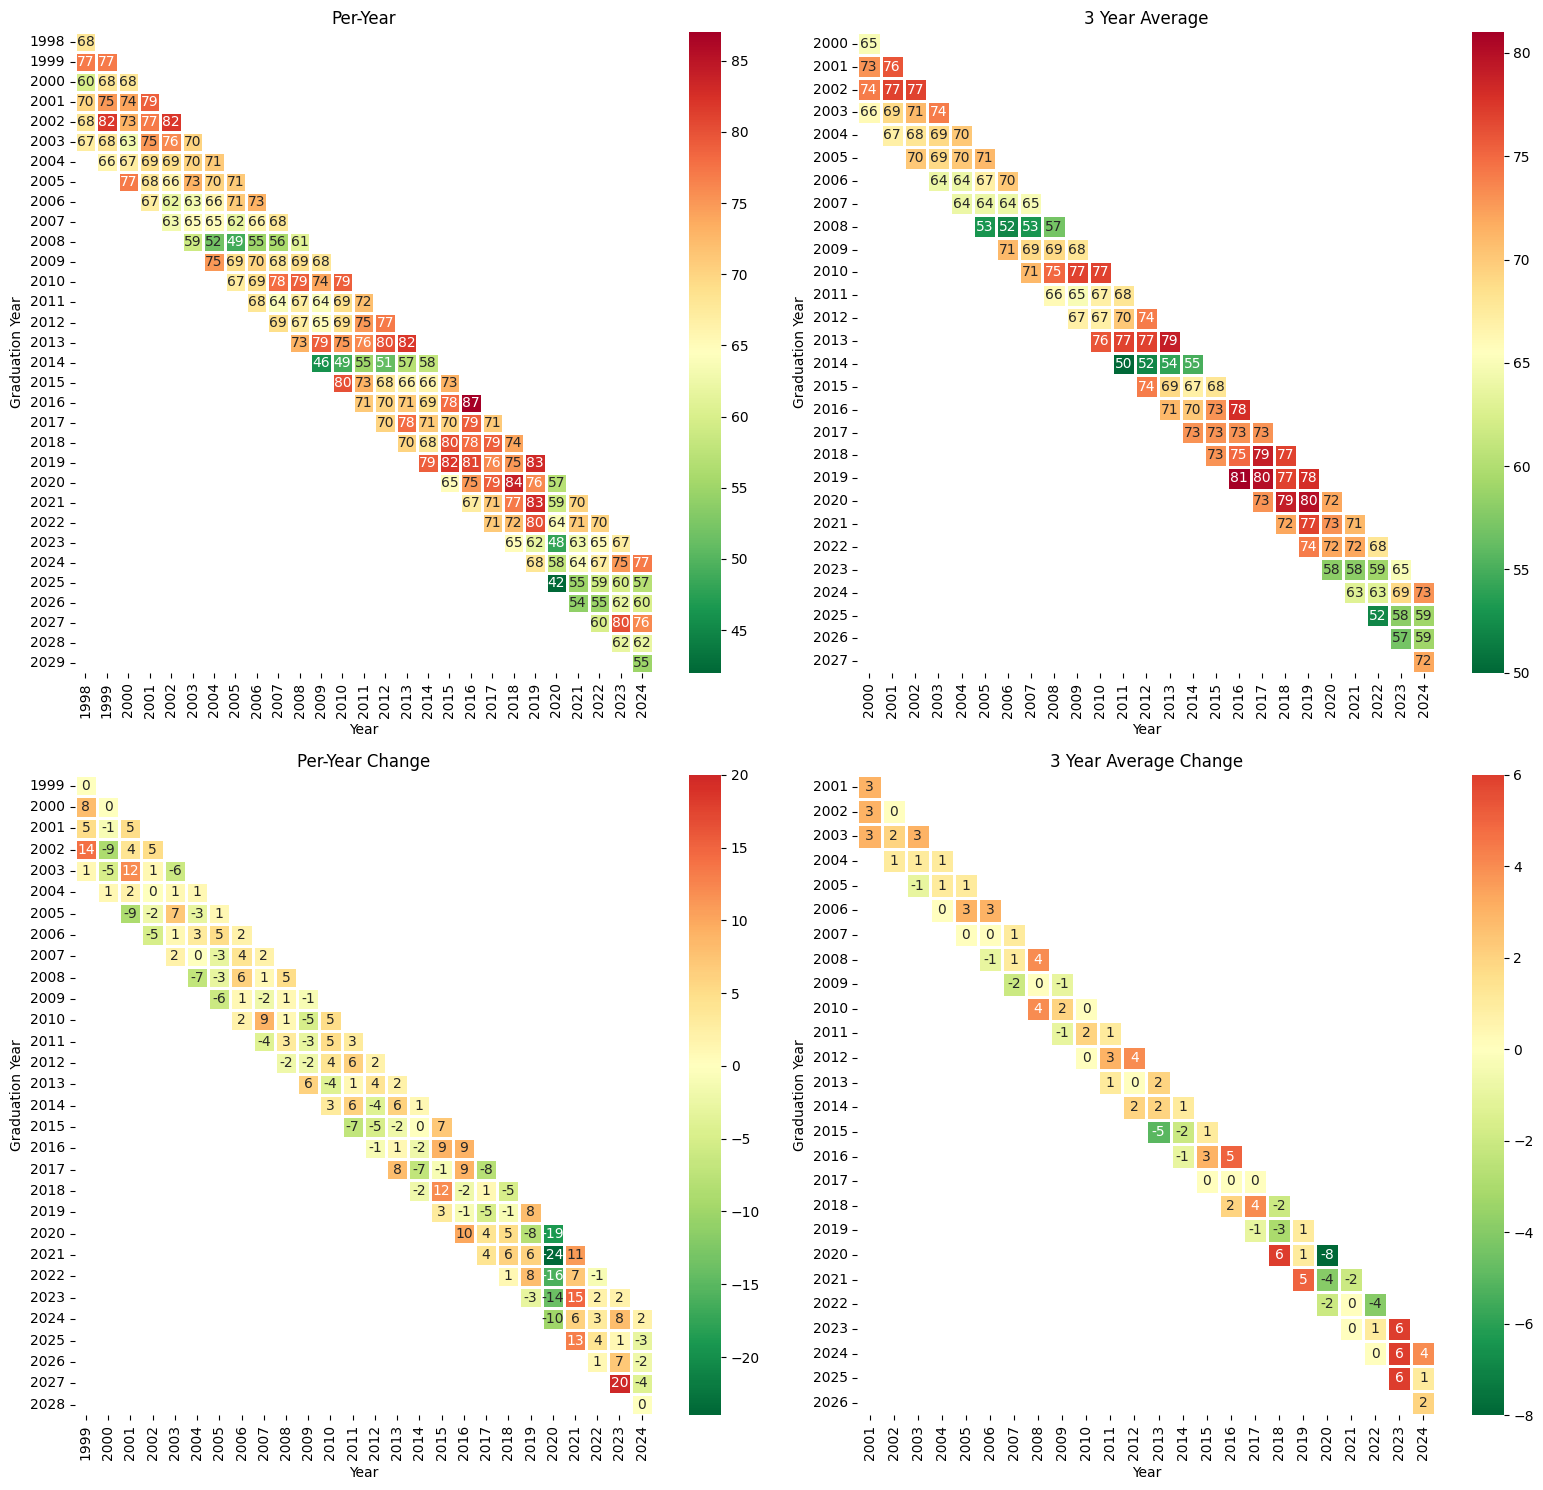

## Northwoods

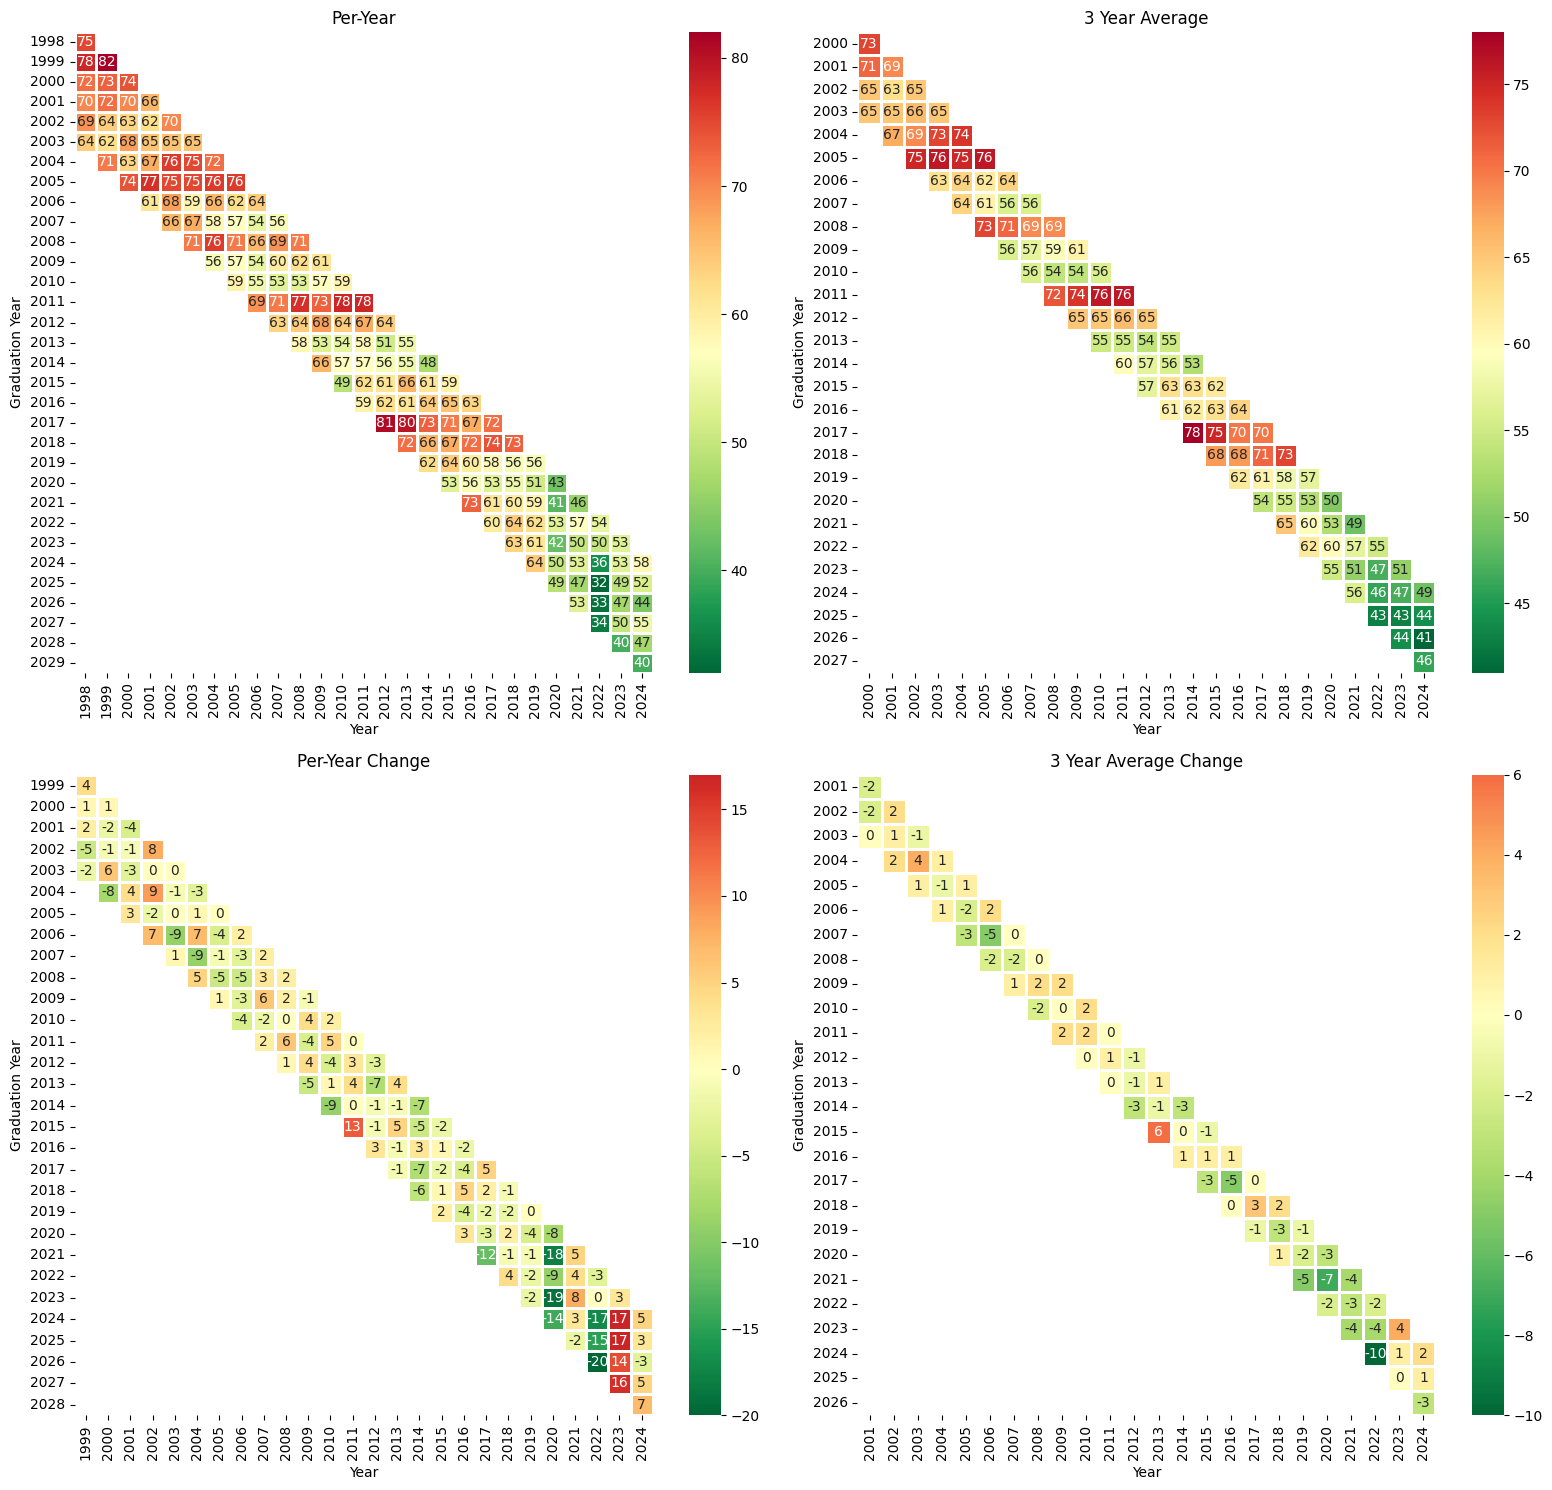

## Putnam Heights

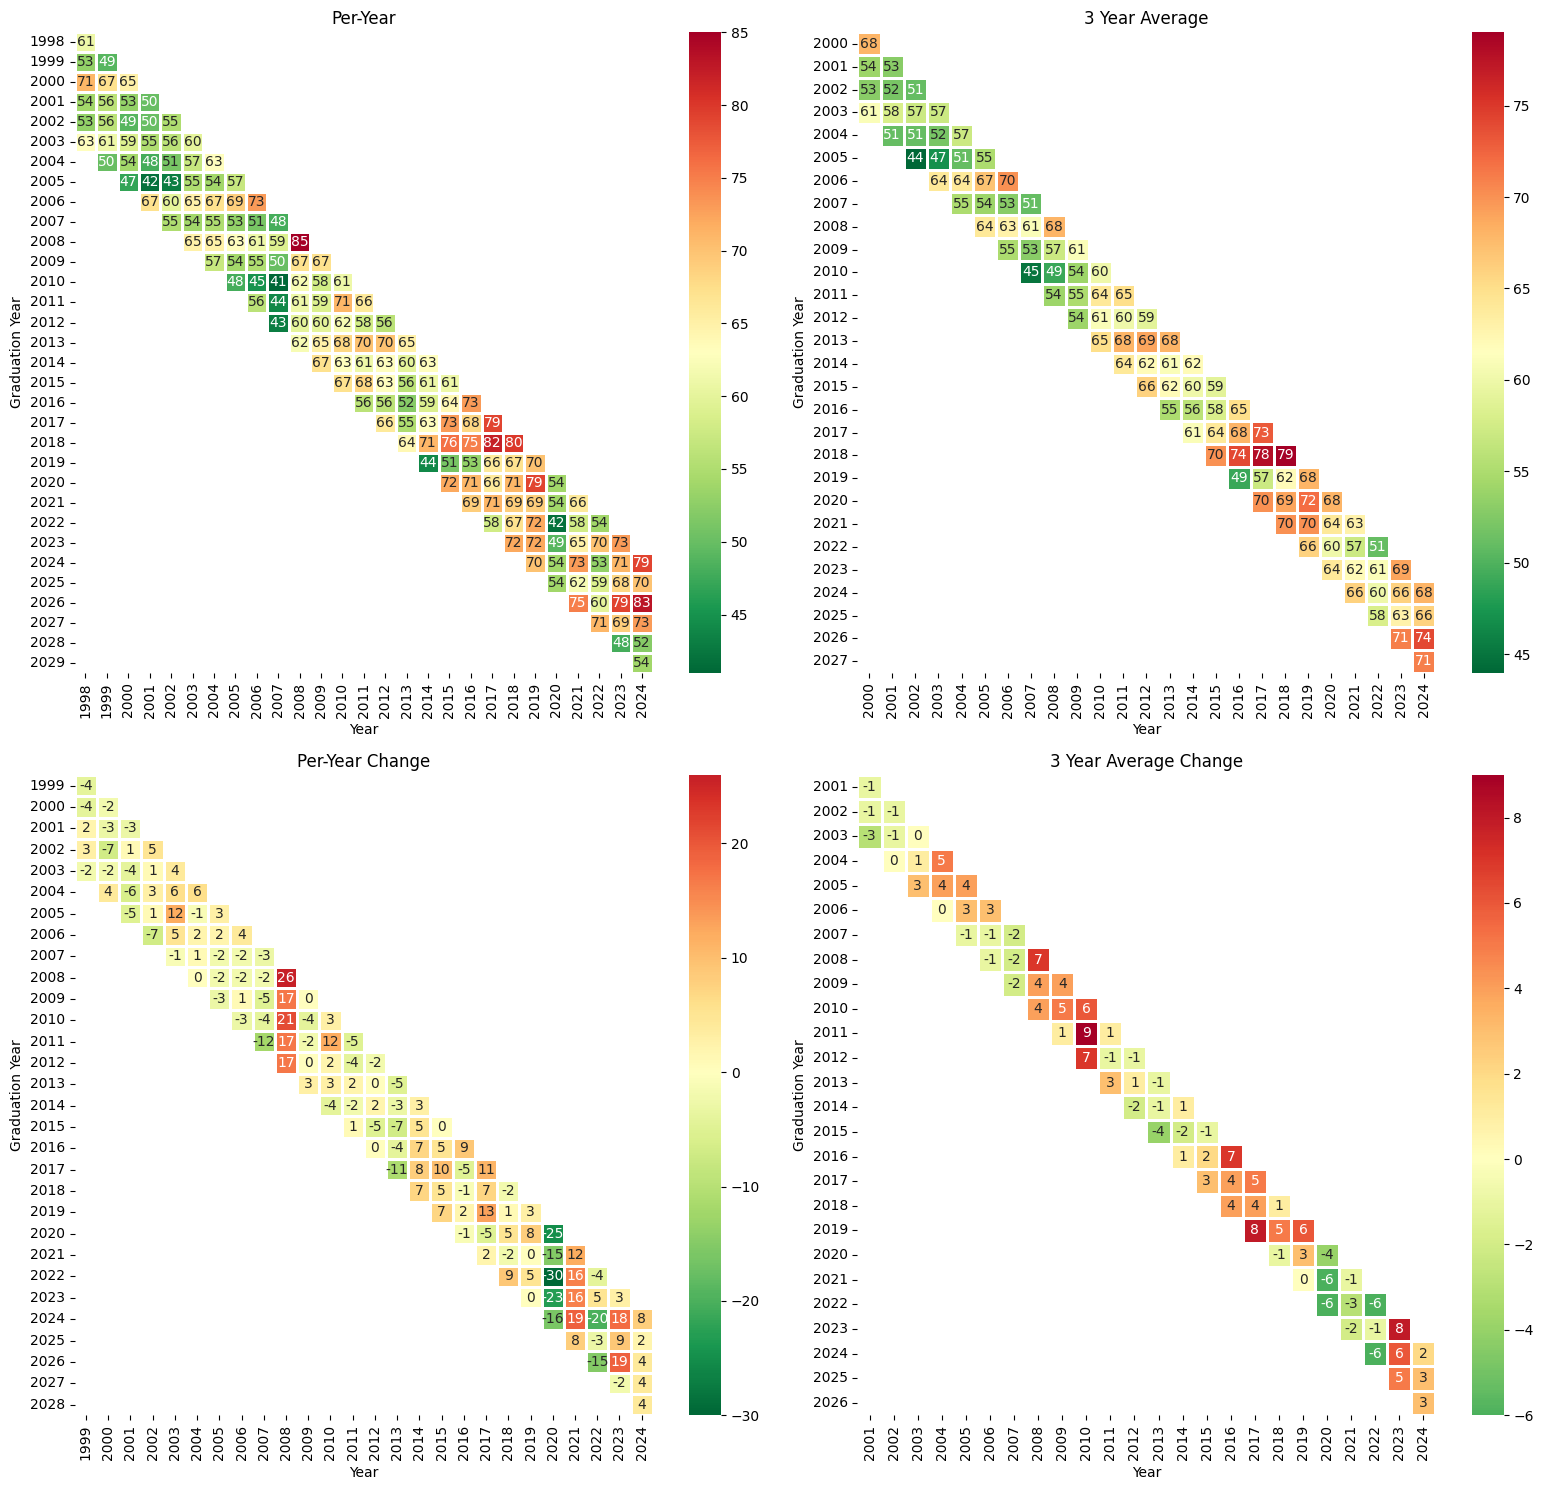

## Robbins

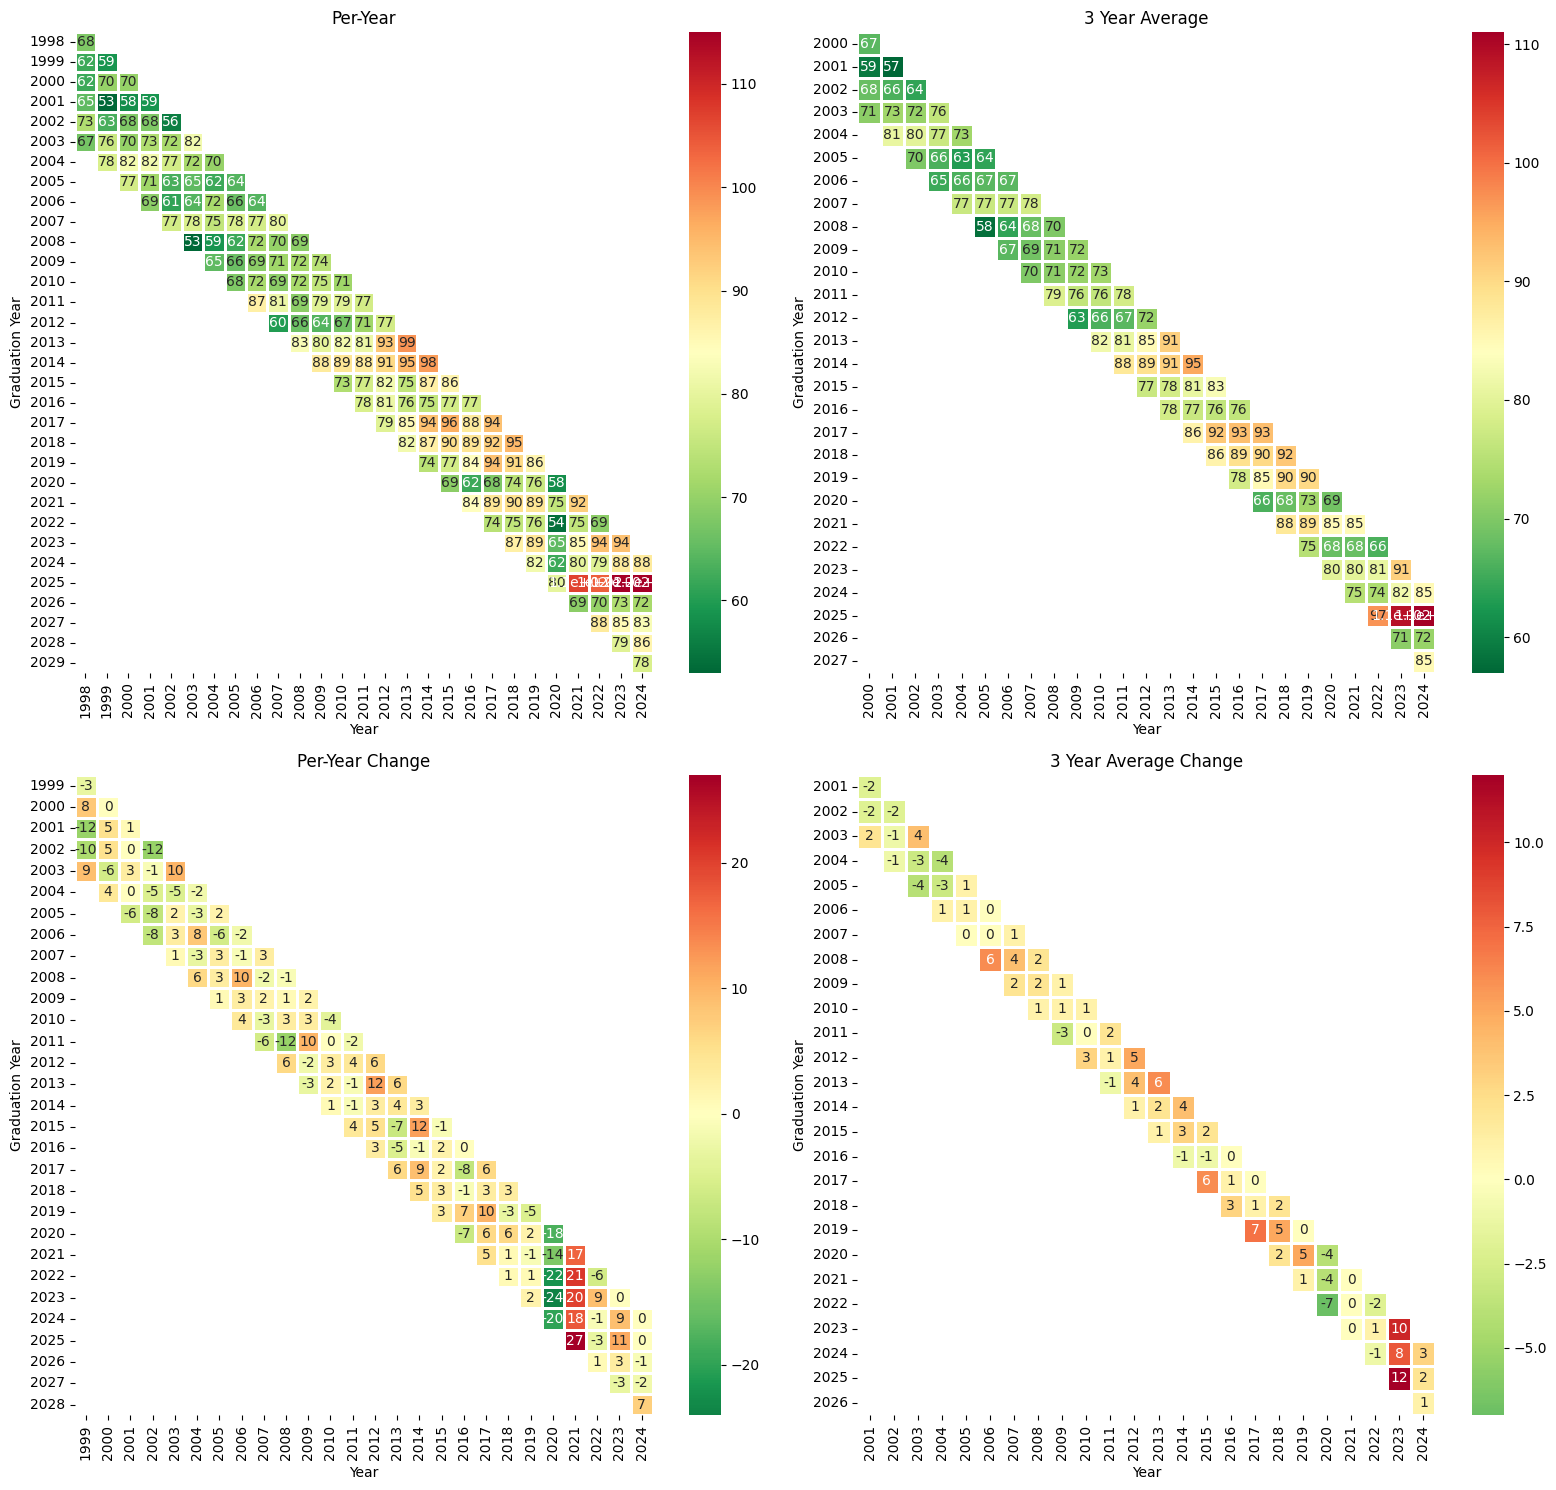

## Roosevelt

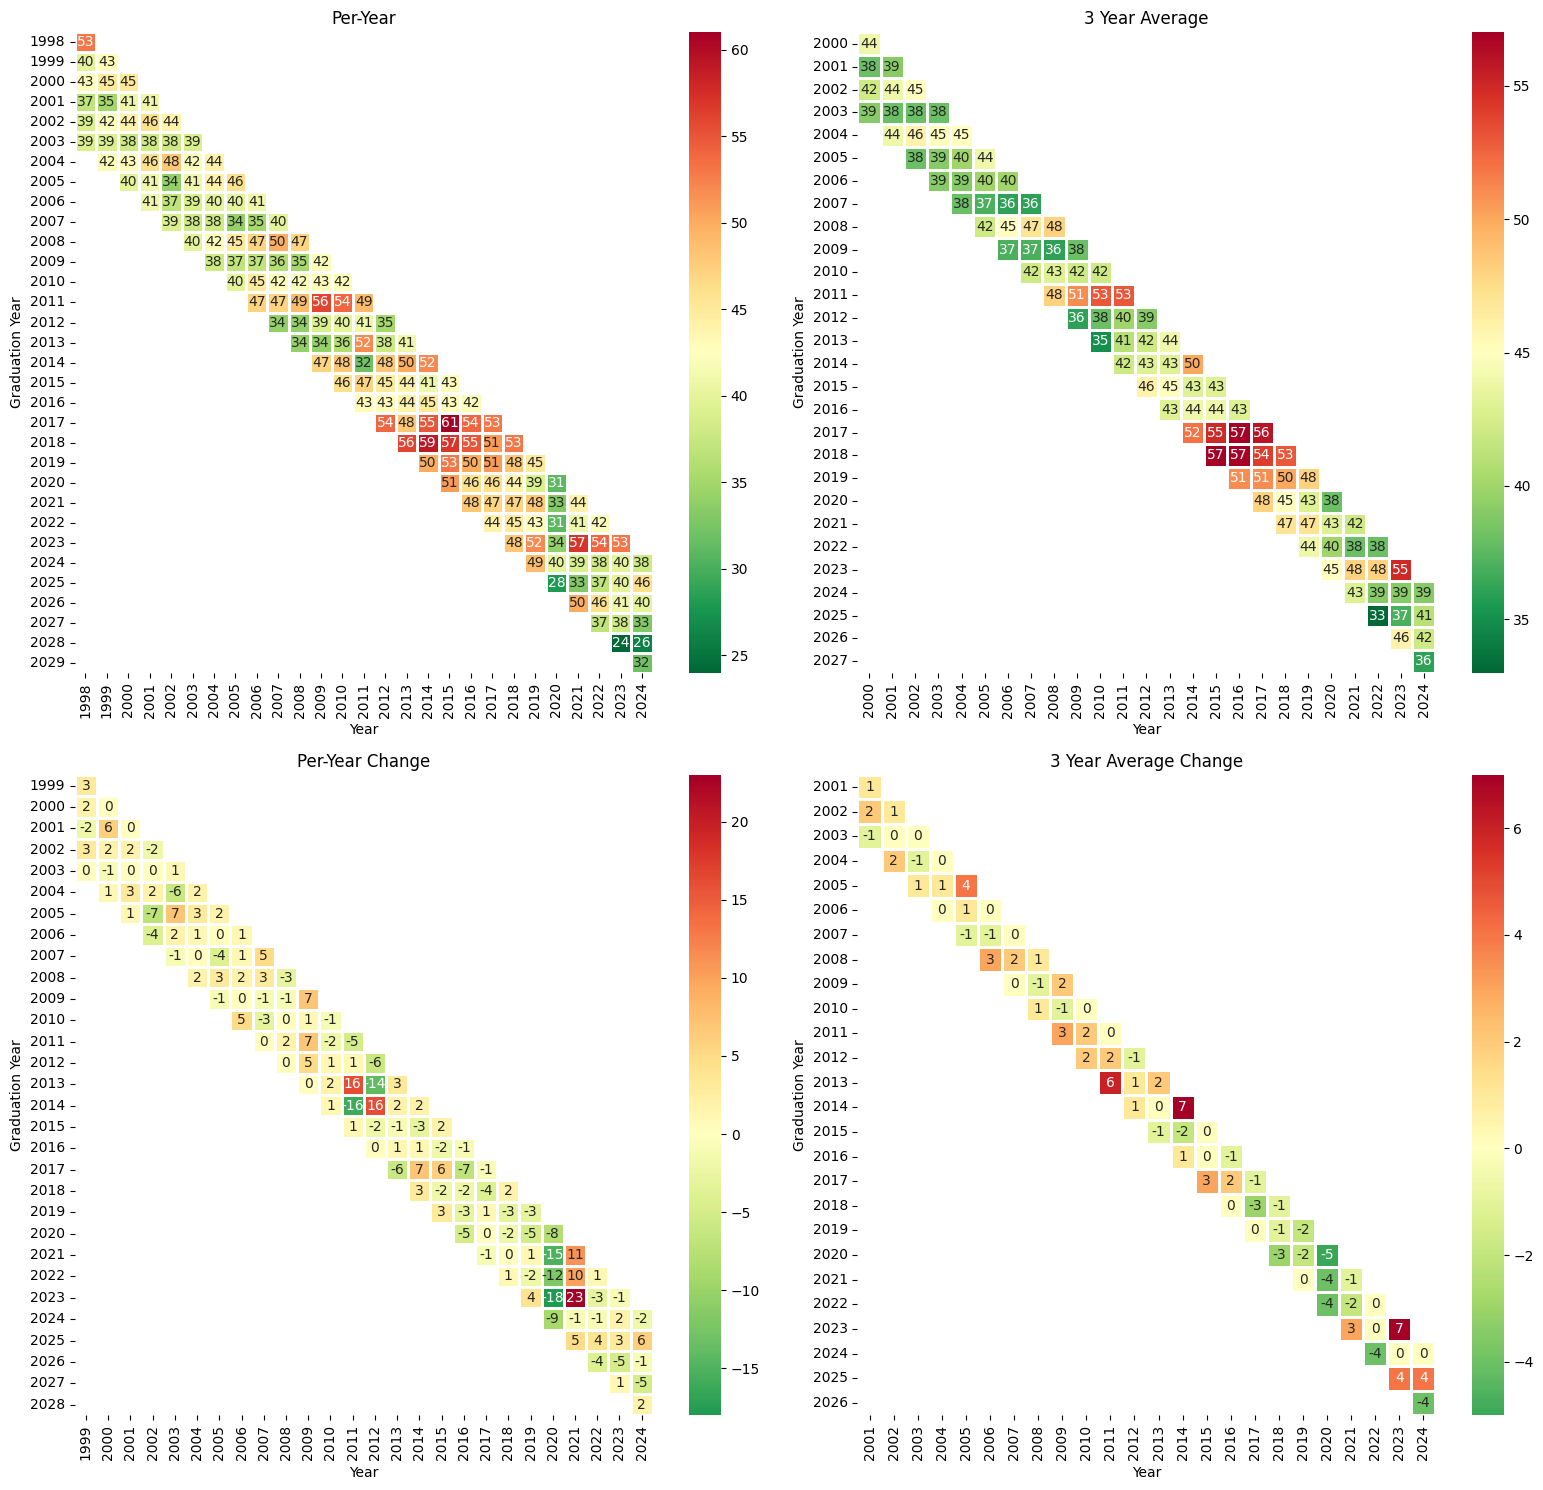

## Sherman

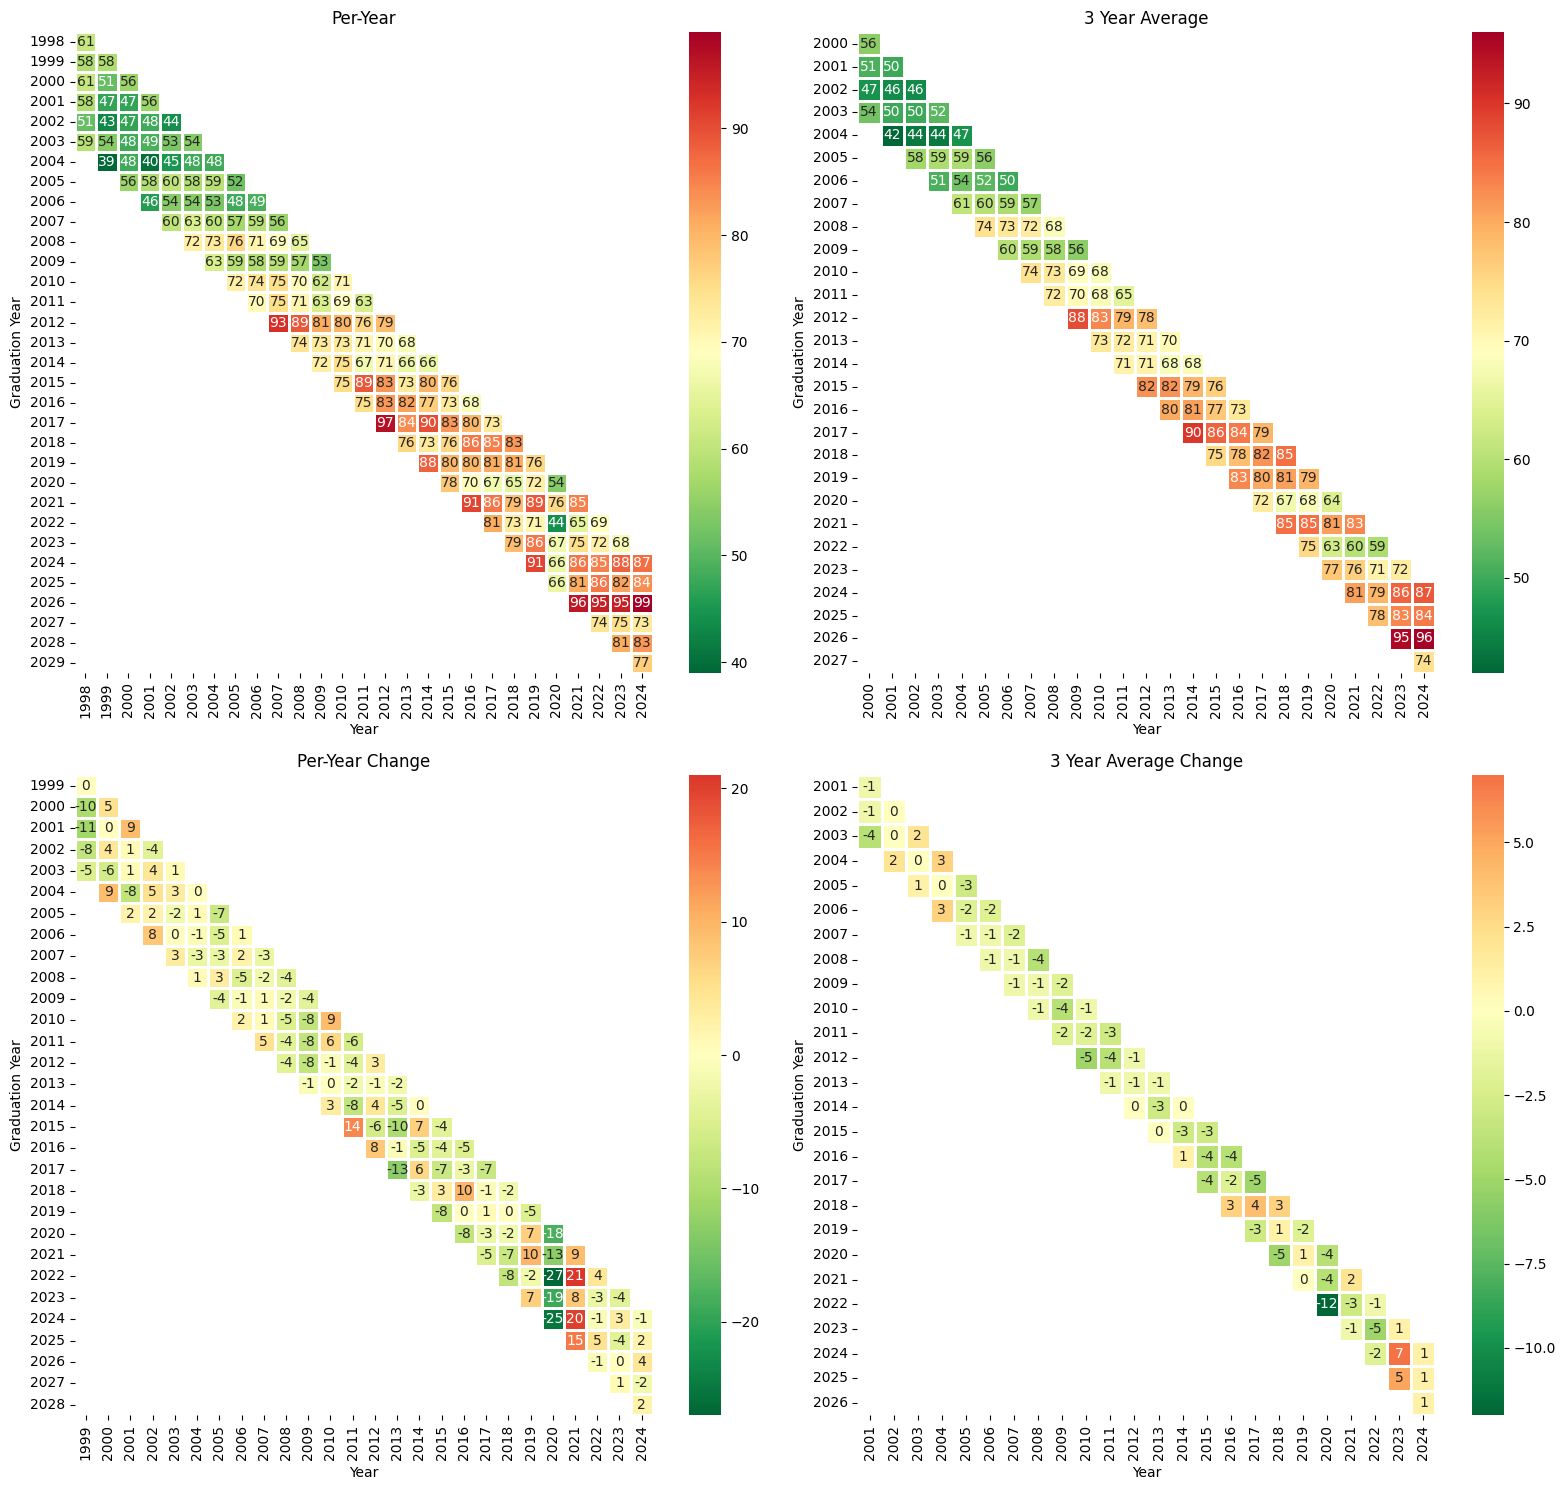

In [12]:
current_schools_enrollment = enrollment[enrollment['School'].isin(enrollment['School'][enrollment['Year'] == enrollment['Year'].max()].unique())]

for school_name, school_enrollment in current_schools_enrollment.groupby('School', observed=True, sort=True):
    display(Markdown(f'## {school_name}'))

    school_cohort_group_sum = school_enrollment.groupby(['Graduation Year', 'Year'])['Students'].sum().astype('int').dropna()
    school_cohort_group_sum = school_cohort_group_sum[school_cohort_group_sum != 0]

    school_cohort_group_rolling_mean = school_cohort_group_sum.groupby(level=0, observed=True).rolling(window=3, min_periods=3).mean().round(0).droplevel(0).dropna()

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 15))
    ax1.set_title('Per-Year')
    ax2.set_title('3 Year Average')
    ax3.set_title('Per-Year Change')
    ax4.set_title('3 Year Average Change')

    sns.heatmap(school_cohort_group_sum.unstack(), annot=True, ax=ax1, cmap="RdYlGn_r", linewidths=1)
    sns.heatmap(school_cohort_group_rolling_mean.unstack(), annot=True, ax=ax2, cmap="RdYlGn_r", linewidths=1)

    sns.heatmap(school_cohort_group_sum.groupby(level=0).diff().dropna().unstack(), annot=True, center=0, ax=ax3, cmap="RdYlGn_r", linewidths=1)
    sns.heatmap(school_cohort_group_rolling_mean.groupby(level=0).diff().dropna().unstack(), annot=True, center=0, ax=ax4, cmap="RdYlGn_r", linewidths=1)

    plt.tight_layout()
    plt.show()